# Predictive Modeling of Breast Cancer Survival

# Table of Content

-  [1.0 Libraries Imported](#1.0-Libraries-Imported)
-  [2.0 Dataset Description](#2.0-Dataset-Description)
-  [3.0 Data Visualization](#3.0-Data-Visualization)
    - [3.1 Numerical data](#3.1-Numerical-data)
- [4.0 Data Preprocessing](#4.0-Data-Preprocessing)
    - [4.1 Missing value in dataset](#4.1-Missing-value-in-dataset)
    - [4.2 Encoding the categorical data](#4.2-Encoding-the-categorical-data)
    - [4.3 Removing the outliers of the data](#4.3-Removing-the-outliers-of-the-data)
    - [4.4 Feature Scaling](#4.4-Feature-Scaling)
    - [4.5 Train test splitting](#4.5-Train-test-splitting)
- [5.0 Decision Tree Classifier](#5.0-Decision-Tree-Classifier)
    - [5.1 Model Training](#5.1-Model-Training)
    - [5.2 Hyperparamater Tuning](#5.2-Hyperparameter-Tuning)
    - [5.3 Hyperparamter Tuning - With Scaled Data](#5.3-Hyperparameter-Tuning---With-Scaled-Data)
 - [6.0 Random Forest Classifier](#6.0-Random-Forest-Classifier)
    - [6.1 Model Training](#6.1-Model-Training)
    - [6.2 Hyperparameter Tuning](#6.2-Hyperparameter-Tuning)
    - [6.3 Hyperparameter Tuning - With Scaled Data](#6.3-Hyperparameter-Tuning---With-Scaled-Data)
 - [7.0 Extra Tree Classifier](#7.0-Extra-Tree-Classifier)
    - [7.1 Model Training](#7.1-Model-Training)
    - [7.2 Hyperparameter Tuning](#7.2-Hyperparameter-Tuning)
    - [7.3 Hyperparameter Tuning - With Scaled Data](#7.3-Hyperparameter-Tuning---With-Scaled-Data)
 - [8.0 Gradient Boosting Classifier](#8.0-Gradient-Boosting-Classifier)
    - [8.1 Model Training](#8.1-Model-Training)
    - [8.2 Hyperparameter Tuning](#8.2-Hyperparameter-Tuning)
    - [8.3 Hyperparameter Tuning - With Scaled Data](#8.3-Hyperparameter-Tuning---With-Scaled-Data)
- [9.0 Comparison of Model](#9.0-Comparison-of-Model) 
    - [9.1 Precision](#9.1-Precision)
    - [9.2 Comparison of precision - Hyperparameter Tuning (Scaled Data)](#9.2-Comparison-of-precision---Hyperparameter-Tuning-(Scaled-Data))
- [10.0 Feature Importance](#10.0-Feature-Importance) 

# 1. Libraries Imported

In [4]:
# Import the libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For creating static, animated, and interactive visualizations
import time  # For time-related tasks

# Import preprocessing modules from sklearn
from sklearn.preprocessing import StandardScaler  # For standardizing features by removing the mean and scaling to unit variance
from sklearn.preprocessing import LabelEncoder  # For encoding categorical features

# Import classifier modules from sklearn
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classification tasks
from sklearn.tree import ExtraTreeClassifier  # For Extra Tree classification tasks
from sklearn.ensemble import RandomForestClassifier  # For Random Forest classification tasks
from sklearn.ensemble import GradientBoostingClassifier  # For Gradient Boosting classification tasks
from sklearn.tree import plot_tree  # For plotting decision tree classifiers

# Import metrics and model selection modules from sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay  # For model evaluation
from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

# 2.0 Dataset Description

In [5]:
#load dataset
dataset = pd.read_csv ('Breast_Cancer.csv')

#display the first few rows of the dataset
dataset.head()

Age   Race Marital Status T Stage N Stage 6th Stage  \
0   68  White        Married      T1      N1       IIA   
1   50  White        Married      T2      N2      IIIA   
2   58  White       Divorced      T3      N3      IIIC   
3   58  White        Married      T1      N1       IIA   
4   47  White        Married      T2      N1       IIB   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive

In [6]:
#display a summary of the information in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [7]:
#generate statistics of the dataset
dataset.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

# 3.0 Data Visualization
## 3.1 Numerical data

<Axes: >

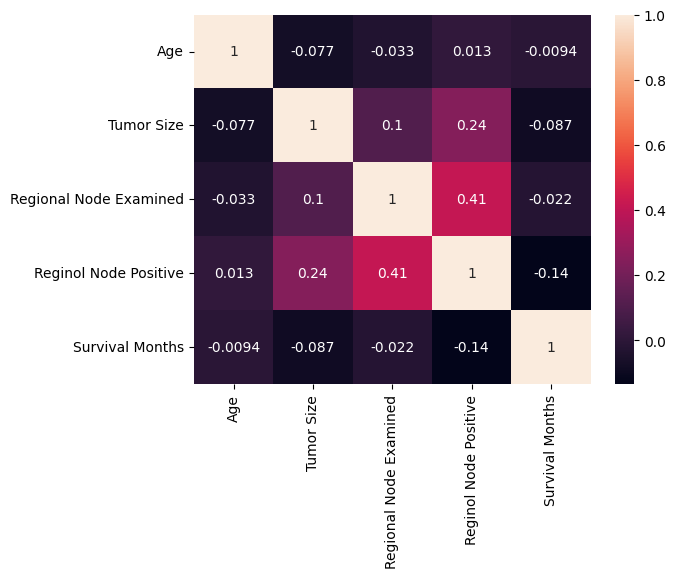

In [8]:
# Numerical columns
numerical_columns = dataset[['Age', 'Tumor Size', 'Regional Node Examined',	'Reginol Node Positive', 'Survival Months']]

# Generate the heatmap
sns.heatmap(numerical_columns.corr(), annot=True)

<Axes: xlabel='Age', ylabel='Count'>

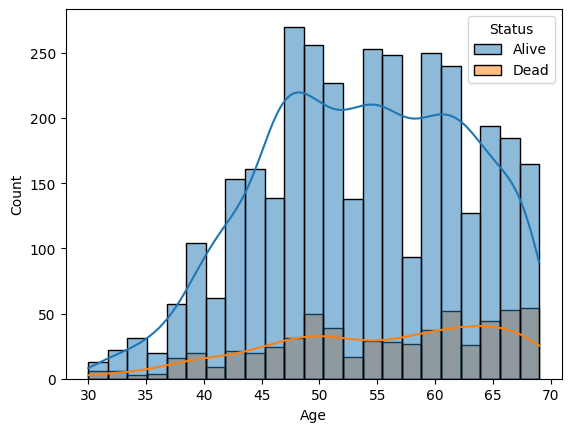

In [9]:
#Correlation between age and the status whether Dead or Alive in histogram
sns.histplot(data=dataset, x='Age', hue='Status', kde=True)

<Axes: xlabel='Status', ylabel='Age'>

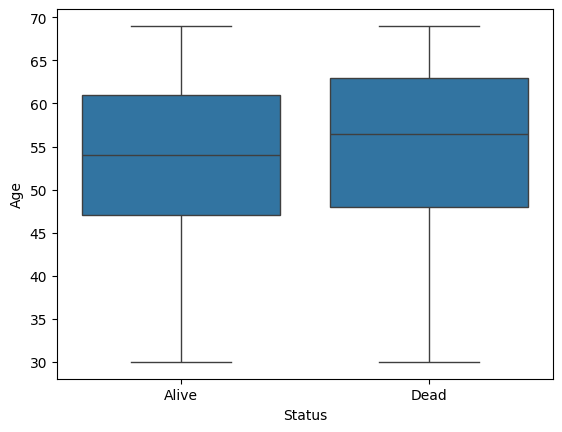

In [10]:
#Correlation between age and the status whether Dead or Alive in histogram
sns.boxplot(data=dataset, x='Status', y='Age')

<Axes: xlabel='Tumor Size', ylabel='Count'>

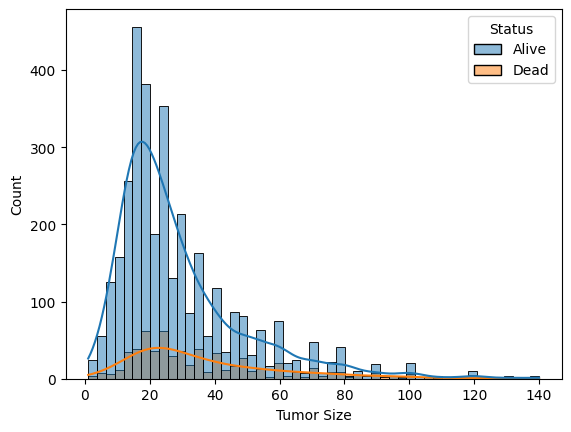

In [11]:
#Create histograms with Tumor Size and status
sns.histplot(data=dataset, x='Tumor Size', hue='Status', kde=True)

<Axes: xlabel='Status', ylabel='Tumor Size'>

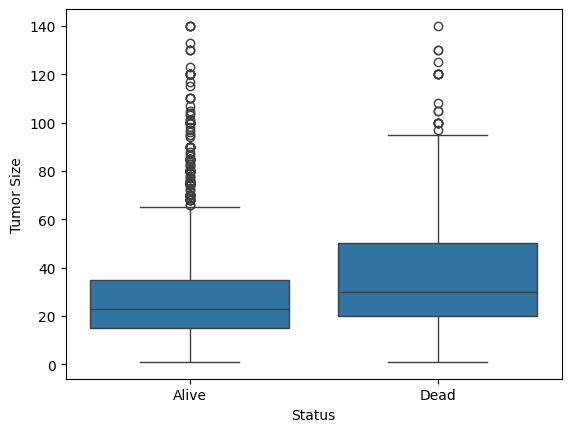

In [12]:
#Create boxplot with Status and Tumor Size
sns.boxplot(data=dataset, x='Status', y='Tumor Size')

<Axes: xlabel='Regional Node Examined', ylabel='Count'>

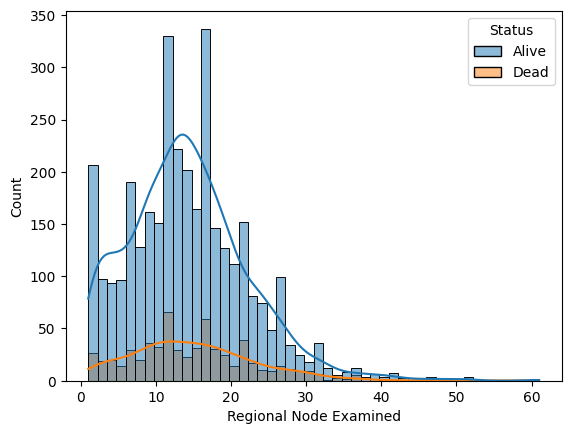

In [13]:
#Create histograms with Regional Node Examined and Status
sns.histplot(data=dataset, x='Regional Node Examined', hue='Status', kde=True)

<Axes: xlabel='Status', ylabel='Regional Node Examined'>

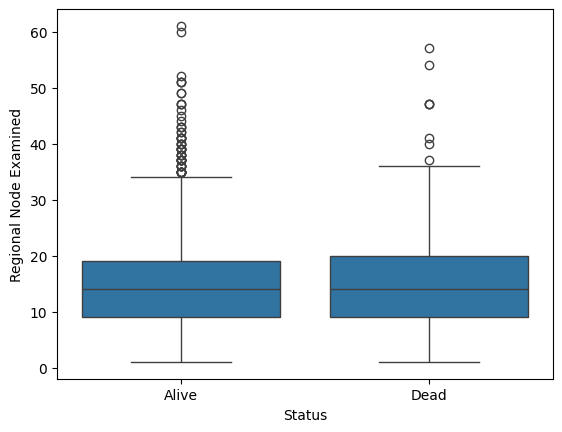

In [14]:
#Create boxplot with Status and Regional Node Examined
sns.boxplot(data=dataset, x='Status', y='Regional Node Examined')

<Axes: xlabel='Reginol Node Positive', ylabel='Count'>

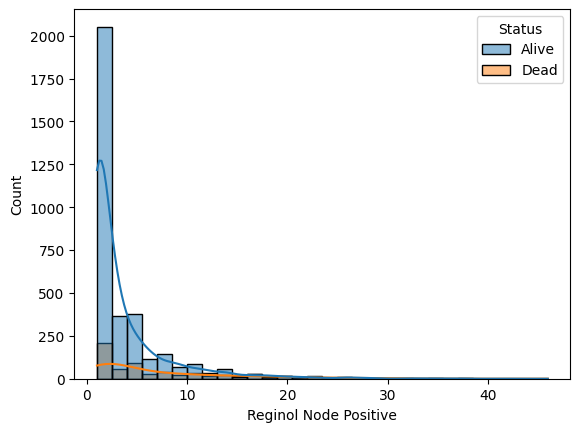

In [15]:
#Create histograms on Reginol Node Positive and Status
sns.histplot(data=dataset, x='Reginol Node Positive', hue='Status', kde=True, bins=30)

<Axes: xlabel='Status', ylabel='Reginol Node Positive'>

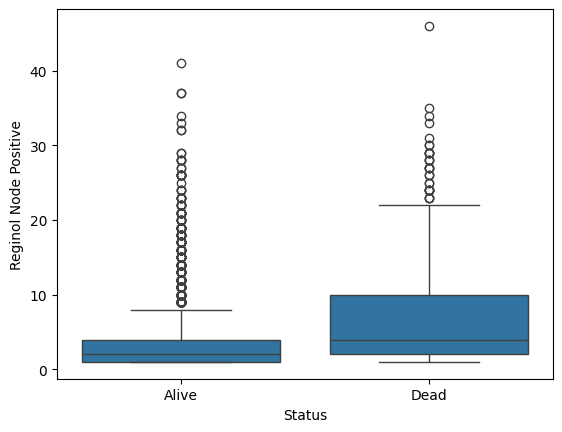

In [16]:
#Create boxplot with status and Reginol Node Positive
sns.boxplot(data=dataset, x='Status', y='Reginol Node Positive')

<Axes: xlabel='Status', ylabel='Survival Months'>

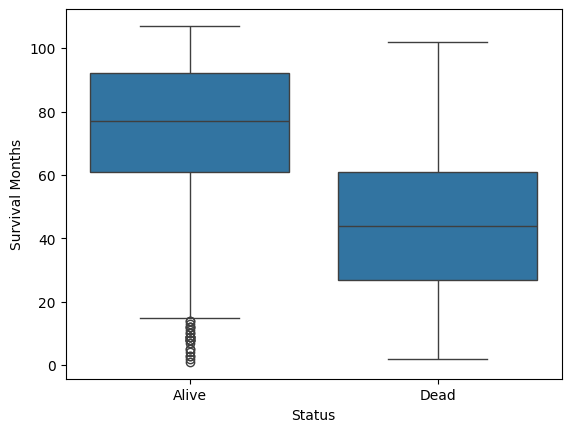

In [17]:
#Create boxplot on status and survival months
sns.boxplot(data=dataset, x='Status', y='Survival Months')

<Axes: xlabel='Survival Months', ylabel='Count'>

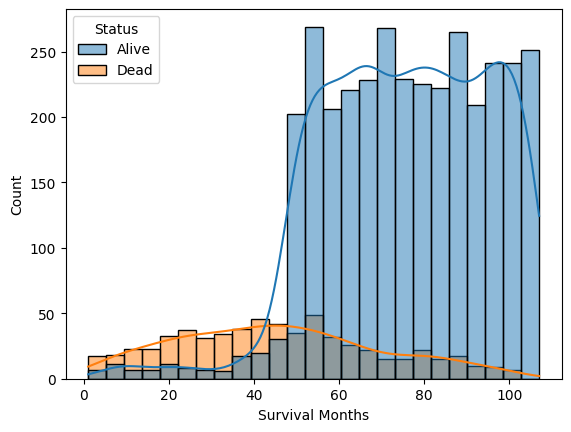

In [18]:
#Create histogram with Survival Months and Status
sns.histplot(data=dataset, x='Survival Months', hue='Status', kde=True)

## 4.0 Data Preprocessing

## 4.1 Missing value in dataset

In [19]:
#handling missing data
#count the number of missing value in each column
print(dataset.isnull().sum())

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


## 4.2 Encoding the categorical data

In [20]:
#Data Encoding
le = LabelEncoder()

dataset['N Stage']=le.fit_transform(dataset['N Stage'])
dataset['Race']=le.fit_transform(dataset['Race'])
dataset['Marital Status']=le.fit_transform(dataset['Marital Status'])
dataset['T Stage']=le.fit_transform(dataset['T Stage'])
dataset['6th Stage']=le.fit_transform(dataset['6th Stage'])
dataset['differentiate']=le.fit_transform(dataset['differentiate'])
dataset['Grade']=le.fit_transform(dataset['Grade'])
dataset['A Stage']=le.fit_transform(dataset['A Stage'])
dataset['Estrogen Status']=le.fit_transform(dataset['Estrogen Status'])
dataset['Progesterone Status']=le.fit_transform(dataset['Progesterone Status'])
dataset['Status']=le.fit_transform(dataset['Status'])

#display the first few rows of the dataset
dataset.head()

Age  Race  Marital Status  T Stage  N Stage  6th Stage  differentiate  \
0   68     2               1        0        0          0              1   
1   50     2               1        1        1          2              0   
2   58     2               0        2        2          4              0   
3   58     2               1        0        0          0              1   
4   47     2               1        1        0          1              1   

   Grade  A Stage  Tumor Size  Estrogen Status  Progesterone Status  \
0      3        1           4                1                    1   
1      2        1          35                1                    1   
2      2        1          63                1                    1   
3      3        1          18                1                    1   
4      3        1          41                1                    1   

   Regional Node Examined  Reginol Node Positive  Survival Months  Status  
0                      24                      1               60       0  
1                      14                      5               62       0  
2                      14                      7               75       0  
3                       2                      1               84       0  
4                       3                      1               50       0

## 4.3 Removing the outliers of the data

<Axes: xlabel='Status', ylabel='Tumor Size'>

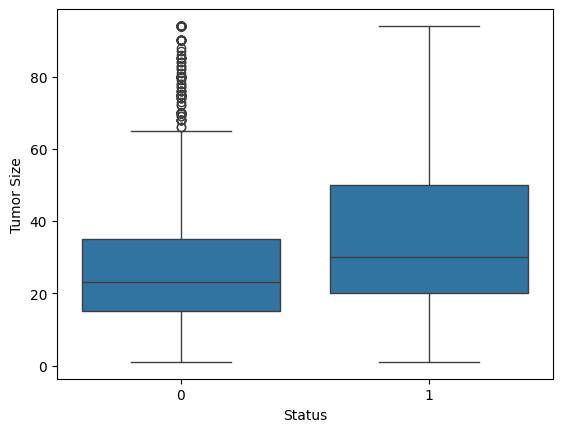

In [21]:
#Outlier Detection and removal using Z-Score Method
#Tumor Size
#find limit 
upper_limit = round(dataset['Tumor Size'].mean() + 3*dataset['Tumor Size'].std())
lower_limit = round(dataset['Tumor Size'].mean() - 3*dataset['Tumor Size'].std())

#find outliers and perform capping (change the outlier value to upper or lower limit)
dataset.loc[dataset['Tumor Size'] >= upper_limit, 'Tumor Size'] = upper_limit
dataset.loc[dataset['Tumor Size'] <= lower_limit, 'Tumor Size'] = lower_limit

#Creating boxplot with Status and Tumor Size
sns.boxplot(data=dataset, x='Status', y='Tumor Size')

<Axes: xlabel='Status', ylabel='Regional Node Examined'>

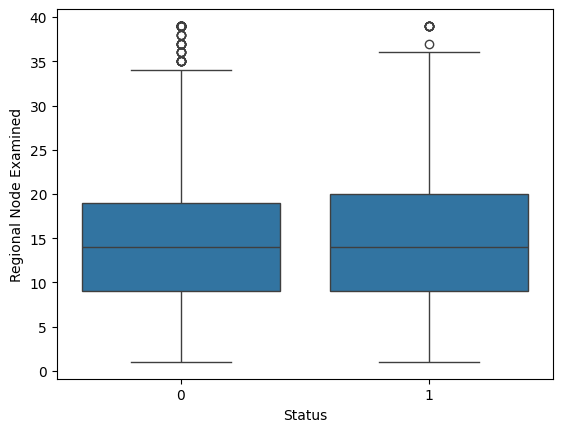

In [22]:
#Outlier Detection and removal using Z-Score Method
#Regional Node Examined
#find limit 
upper_limit = round(dataset['Regional Node Examined'].mean() + 3*dataset['Regional Node Examined'].std())
lower_limit = round(dataset['Regional Node Examined'].mean() - 3*dataset['Regional Node Examined'].std())

#find outliers and perform capping (change the outlier value to upper or lower limit)
dataset.loc[dataset['Regional Node Examined'] >= upper_limit, 'Regional Node Examined'] = upper_limit
dataset.loc[dataset['Regional Node Examined'] <= lower_limit, 'Regional Node Examined'] = lower_limit

#Creating boxplot with Status and Regional Node Examined
sns.boxplot(data=dataset, x='Status', y='Regional Node Examined')

<Axes: xlabel='Status', ylabel='Reginol Node Positive'>

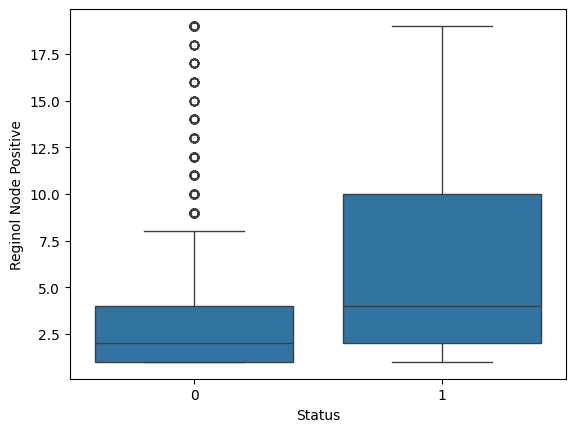

In [23]:
#Outlier Detection and removal using Z-Score Method
#Reginol Node Positive
#find limit 
upper_limit = round(dataset['Reginol Node Positive'].mean() + 3*dataset['Reginol Node Positive'].std())
lower_limit = round(dataset['Reginol Node Positive'].mean() - 3*dataset['Reginol Node Positive'].std())

#find outliers and perform capping (change the outlier value to upper or lower limit)
dataset.loc[dataset['Reginol Node Positive'] >= upper_limit, 'Reginol Node Positive'] = upper_limit
dataset.loc[dataset['Reginol Node Positive'] <= lower_limit, 'Reginol Node Positive'] = lower_limit

#Creating boxplot with Status and Regional Node Examined
sns.boxplot(data=dataset, x='Status', y='Reginol Node Positive')

<Axes: xlabel='Status', ylabel='Survival Months'>

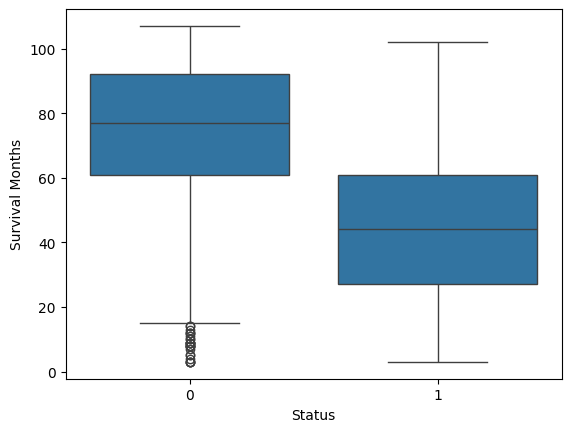

In [24]:
#Outlier Detection and removal using Z-Score Method
#Survival Months
#find limit 
upper_limit = round(dataset['Survival Months'].mean() + 3*dataset['Survival Months'].std())
lower_limit = round(dataset['Survival Months'].mean() - 3*dataset['Survival Months'].std())

#find outliers and perform capping (change the outlier value to upper or lower limit)
dataset.loc[dataset['Survival Months'] >= upper_limit, 'Survival Months'] = upper_limit
dataset.loc[dataset['Survival Months'] <= lower_limit, 'Survival Months'] = lower_limit

#Creating boxplot with Status and Survival Months
sns.boxplot(data=dataset, x='Status', y='Survival Months')

## 4.4 Feature Scaling

In [25]:
#feature Scaling - normalization and standardization

#standardizing numerical features
scaler = StandardScaler()

# Select numerical features
X_number = dataset[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']]
# Select categorical features by dropping specific columns
X_category = dataset.drop(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Status', 'Survival Months'], axis=1)

#Fit the instance into the scaler
scaler.fit(X_number)

# Scale numerical features using the previously created scaler
X_scaled = scaler.transform(X_number)
# Create a DataFrame with the scaled numerical features
X_scaled = pd.DataFrame(X_scaled, index=X_number.index, columns=X_number.columns)
# Concatenate the scaled numerical features with the original categorical features
X_scaled = pd.concat([X_scaled, X_category], axis=1)
# Display the first few rows of the combined dataset
X_scaled.head()

Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0  1.565253   -1.312439                1.233807              -0.674054   
1 -0.443222    0.242893               -0.037631               0.224536   
2  0.449434    1.647708               -0.037631               0.673831   
3  0.449434   -0.610031               -1.563357              -0.674054   
4 -0.777968    0.543925               -1.436213              -0.674054   

   Survival Months  Race  Marital Status  T Stage  N Stage  6th Stage  \
0        -0.493096     2               1        0        0          0   
1        -0.405816     2               1        1        1          2   
2         0.161502     2               0        2        2          4   
3         0.554261     2               1        0        0          0   
4        -0.929494     2               1        1        0          1   

   differentiate  Grade  A Stage  Estrogen Status  Progesterone Status  
0              1      3        1                1                    1  
1              0      2        1                1                    1  
2              0      2        1                1                    1  
3              1      3        1                1                    1  
4              1      3        1                1                    1

## 4.5 Train test splitting

In [26]:
#Create dependent and independent variable vectors
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [27]:
#Split the dataset for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
x_train_scaled, x_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size=0.2)

In [28]:
#Check the shape of the training data
print(f'Shape of the training data: {(x_train.shape, y_train.shape)}')

#Check the shape of the test data
print(f'Shape of the test data: {(x_test.shape, y_test.shape)}')

Shape of the training data: ((3219, 15), (3219,))
Shape of the test data: ((805, 15), (805,))


In [29]:
#display summary of the scaled dataset
dataset.describe()

Age         Race  Marital Status      T Stage      N Stage  \
count  4024.000000  4024.000000     4024.000000  4024.000000  4024.000000   
mean     53.972167     1.775845        1.371272     0.784791     0.438370   
std       8.963134     0.564465        1.063637     0.765531     0.693479   
min      30.000000     0.000000        0.000000     0.000000     0.000000   
25%      47.000000     2.000000        1.000000     0.000000     0.000000   
50%      54.000000     2.000000        1.000000     1.000000     0.000000   
75%      61.000000     2.000000        1.000000     1.000000     1.000000   
max      69.000000     2.000000        4.000000     3.000000     2.000000   

         6th Stage  differentiate        Grade      A Stage   Tumor Size  \
count  4024.000000    4024.000000  4024.000000  4024.000000  4024.000000   
mean      1.321819       0.690358     2.131710     0.977137    30.158797   
std       1.266624       1.016418     0.642398     0.149485    19.933917   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     2.000000     1.000000    16.000000   
50%       1.000000       0.000000     2.000000     1.000000    25.000000   
75%       2.000000       1.000000     3.000000     1.000000    38.000000   
max       4.000000       3.000000     3.000000     1.000000    94.000000   

       Estrogen Status  Progesterone Status  Regional Node Examined  \
count      4024.000000          4024.000000             4024.000000   
mean          0.933151             0.826541               14.295974   
std           0.249791             0.378691                7.866088   
min           0.000000             0.000000                1.000000   
25%           1.000000             1.000000                9.000000   
50%           1.000000             1.000000               14.000000   
75%           1.000000             1.000000               19.000000   
max           1.000000             1.000000               39.000000   

       Reginol Node Positive  Survival Months       Status  
count            4024.000000      4024.000000  4024.000000  
mean                4.000497        71.299205     0.153082  
std                 4.451970        22.917688     0.360111  
min                 1.000000         3.000000     0.000000  
25%                 1.000000        56.000000     0.000000  
50%                 2.000000        73.000000     0.000000  
75%                 5.000000        90.000000     0.000000  
max                19.000000       107.000000     1.000000

# 5.0 Decision Tree Classifier
## 5.1 Model Training

In [30]:
# Create a Decision Tree Classifier instance
dtc1 = DecisionTreeClassifier() 
# Train the model using training data
dtc1.fit (x_train, y_train)

DecisionTreeClassifier()

In [31]:
# Get the parameters of the Decision Tree Classifier
dtc1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Train score: 1.0
Test score: 0.822360248447205
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       685
           1       0.42      0.53      0.47       120

    accuracy                           0.82       805
   macro avg       0.67      0.70      0.68       805
weighted avg       0.84      0.82      0.83       805



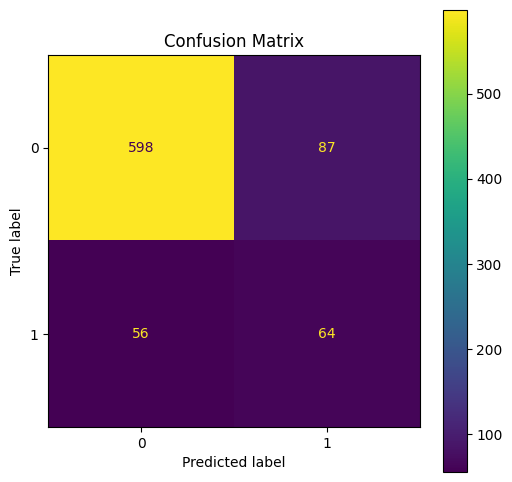

In [32]:
# Predict and evaluate on the training set
pred_train = dtc1.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Predict and evaluate on the test set
pred_test = dtc1.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=dtc1.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=dtc1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc1.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

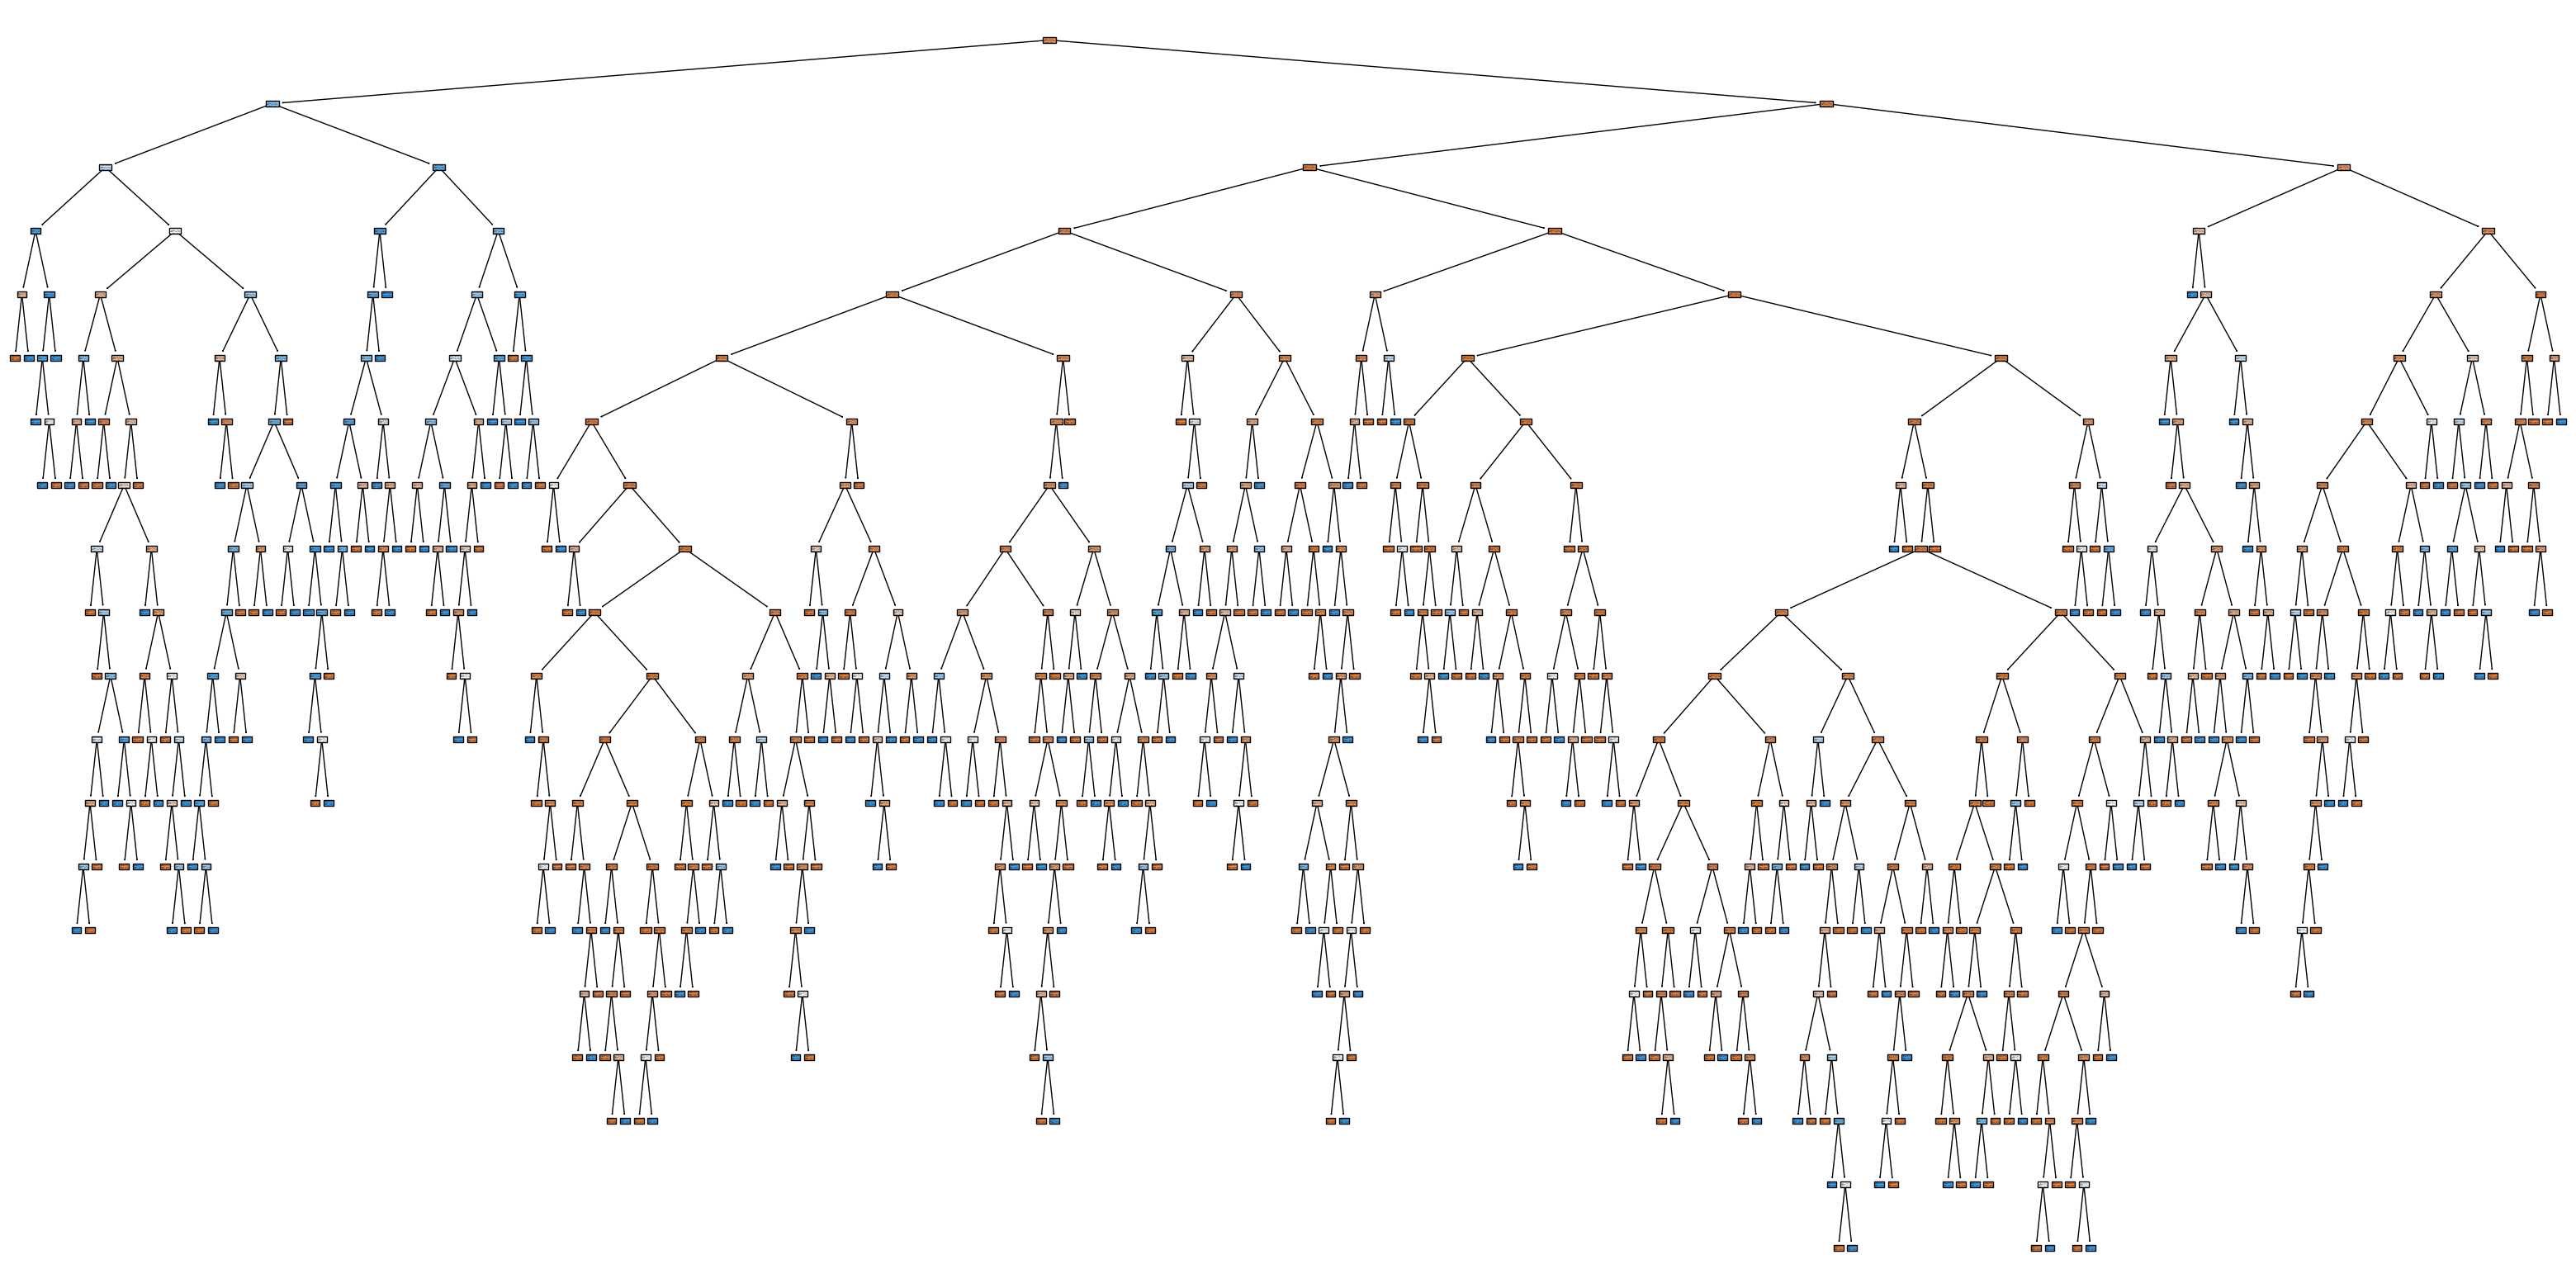

In [33]:
# Set the size of the figure
plt.figure (figsize=(40,20))
# Create a DataFrame for feature names
x_df = pd.DataFrame(x)

# Plot the decision tree
plot_tree(dtc1, filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)
# Save the plot as an image
plt.savefig ('Decision Tree Classifier')
# Show the plot
plt.show()

## 5.2 Hyperparameter Tuning

Best Parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 14}
--- 56.23804950714111 seconds
Train score: 0.9276172724448587
Test score: 0.893167701863354
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       685
           1       0.71      0.48      0.57       120

    accuracy                           0.89       805
   macro avg       0.81      0.72      0.76       805
weighted avg       0.88      0.89      0.88       805



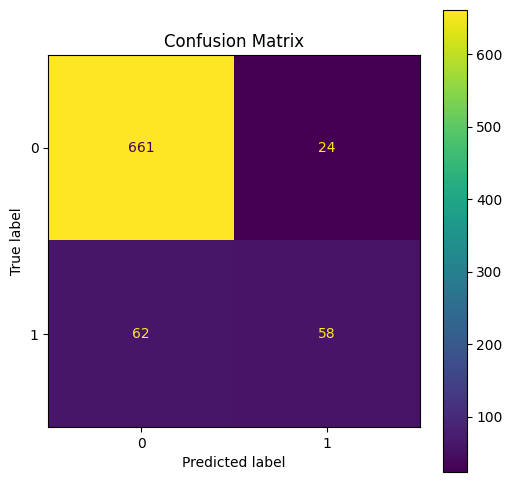

In [36]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': list(range(10, 51, 5)),  # Values from 10 to 50 with a step of 10
    'min_samples_split': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
    'min_samples_leaf': list(range(1, 6)),  # Values from 1 to 5
    'min_impurity_decrease': [i/10.0 for i in range(6)]  # Values from 0.0 to 0.5 with a step of 0.1
}

# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier() 

start_time = time.time()

# Create and fit the Decsion Tree Classifier model using GridSearchCV
dtc2 = GridSearchCV(dtc, param_grid, cv=5)
dtc2.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", dtc2.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Print the best hyperparameters and classification report
pred_train = dtc2.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Predict and evaluate on the test set
pred_test = dtc2.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=dtc2.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=dtc2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc2.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

## 5.3 Hyperparameter Tuning - With Scaled Data

Best Parameters: {'max_depth': 10, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 4, 'min_samples_split': 20}
--- 89.94709610939026 seconds
Train score: 0.9179869524697111
Test score: 0.8956521739130435
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       690
           1       0.67      0.54      0.60       115

    accuracy                           0.90       805
   macro avg       0.80      0.75      0.77       805
weighted avg       0.89      0.90      0.89       805



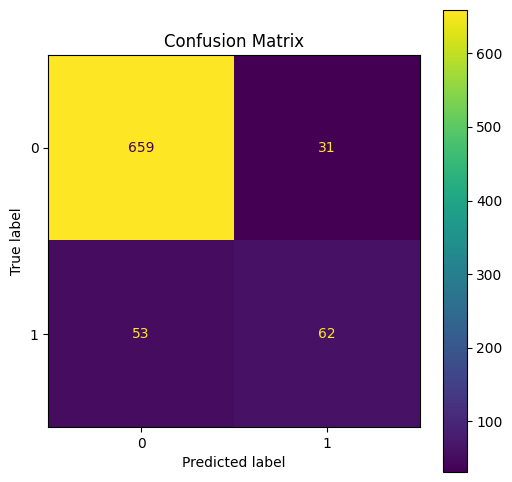

In [37]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': list(range(10, 51, 5)),  # Values from 10 to 50 with a step of 5
    'min_samples_split': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
    'min_samples_leaf': list(range(1, 6)),  # Values from 1 to 5
    'min_impurity_decrease': [i/10.0 for i in range(6)]  # Values from 0.0 to 0.5 with a step of 0.1
}

# Start timing
start_time = time.time()

# Create and fit the Decsion Tree Classifier model using GridSearchCV
final_dtc = GridSearchCV(dtc, param_grid, cv=5)
final_dtc.fit(x_train_scaled, y_train_scaled)

# Print the best hyperparameters
print("Best Parameters:", final_dtc.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Print the best hyperparameters and classification report
pred_train = final_dtc.predict(x_train_scaled)
print(f'Train score: {accuracy_score(y_train_scaled, pred_train)}')

# Evaluate on the training set
pred_test = final_dtc.predict(x_test_scaled)
print(f'Test score: {accuracy_score(y_test_scaled, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test_scaled, pred_test, labels=final_dtc.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test_scaled, pred_test, labels=final_dtc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_dtc.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

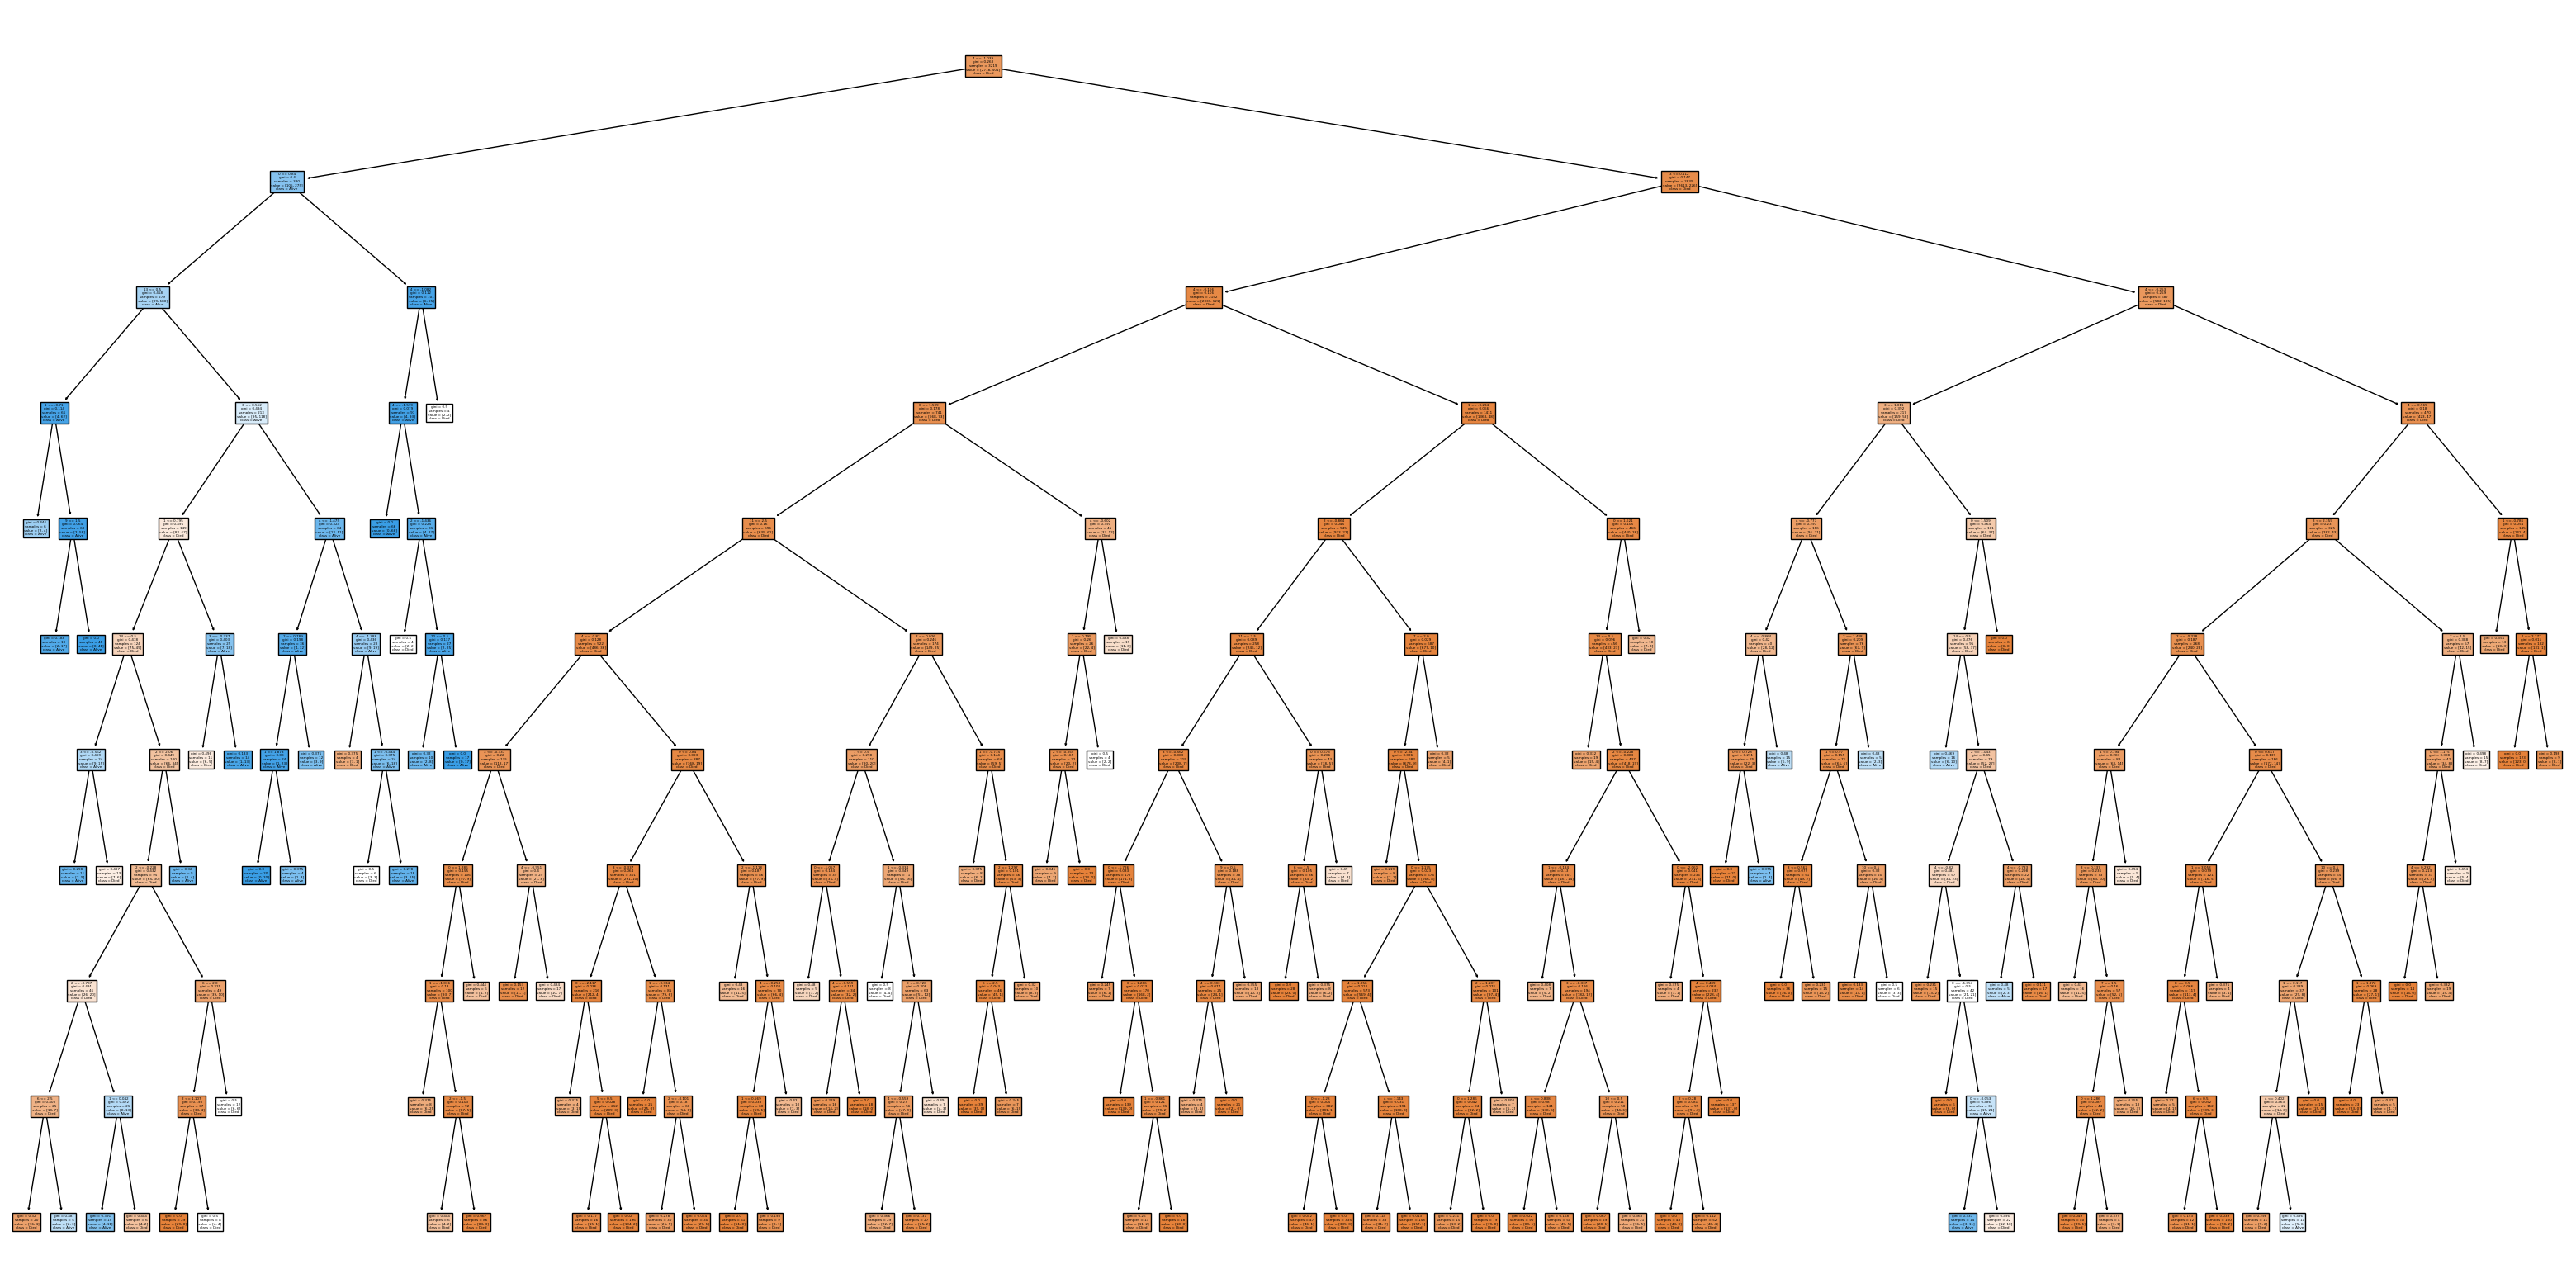

In [43]:
plt.figure (figsize=(40,20))
x_df = pd.DataFrame(x)
best_dtc = final_dtc.best_estimator_

# Then plot the best decision tree
plot_tree(best_dtc, filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)
plt.savefig ('Decision Tree Classifier - Hyperparamter')
plt.show()

# 6.0 Random Forest Classifier
## 6.1 Model Training

In [56]:
# Create a Random Forest Classifier instance
rf1 = RandomForestClassifier() 
# Train the model using training data
rf1.fit (x_train, y_train)

RandomForestClassifier()

In [57]:
# Get the hyperparameters of the Random Forest Classifier
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Train score: 0.9996893445169307
Test score: 0.9031055900621118
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.82      0.45      0.58       120

    accuracy                           0.90       805
   macro avg       0.86      0.72      0.76       805
weighted avg       0.90      0.90      0.89       805



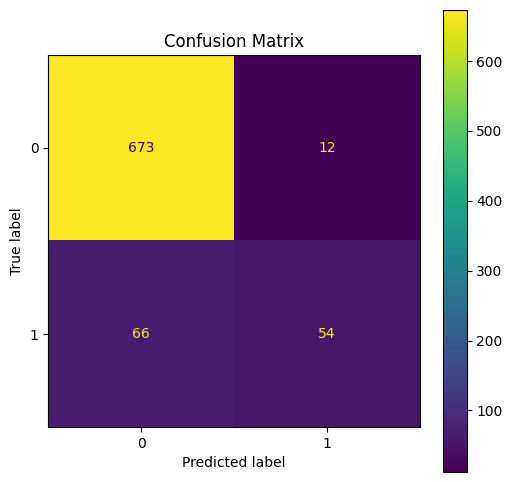

In [58]:
# Predict and evaluate on the training set
pred_train = rf1.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Predict and evaluate on the test set
pred_test = rf1.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=rf1.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=rf1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf1.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

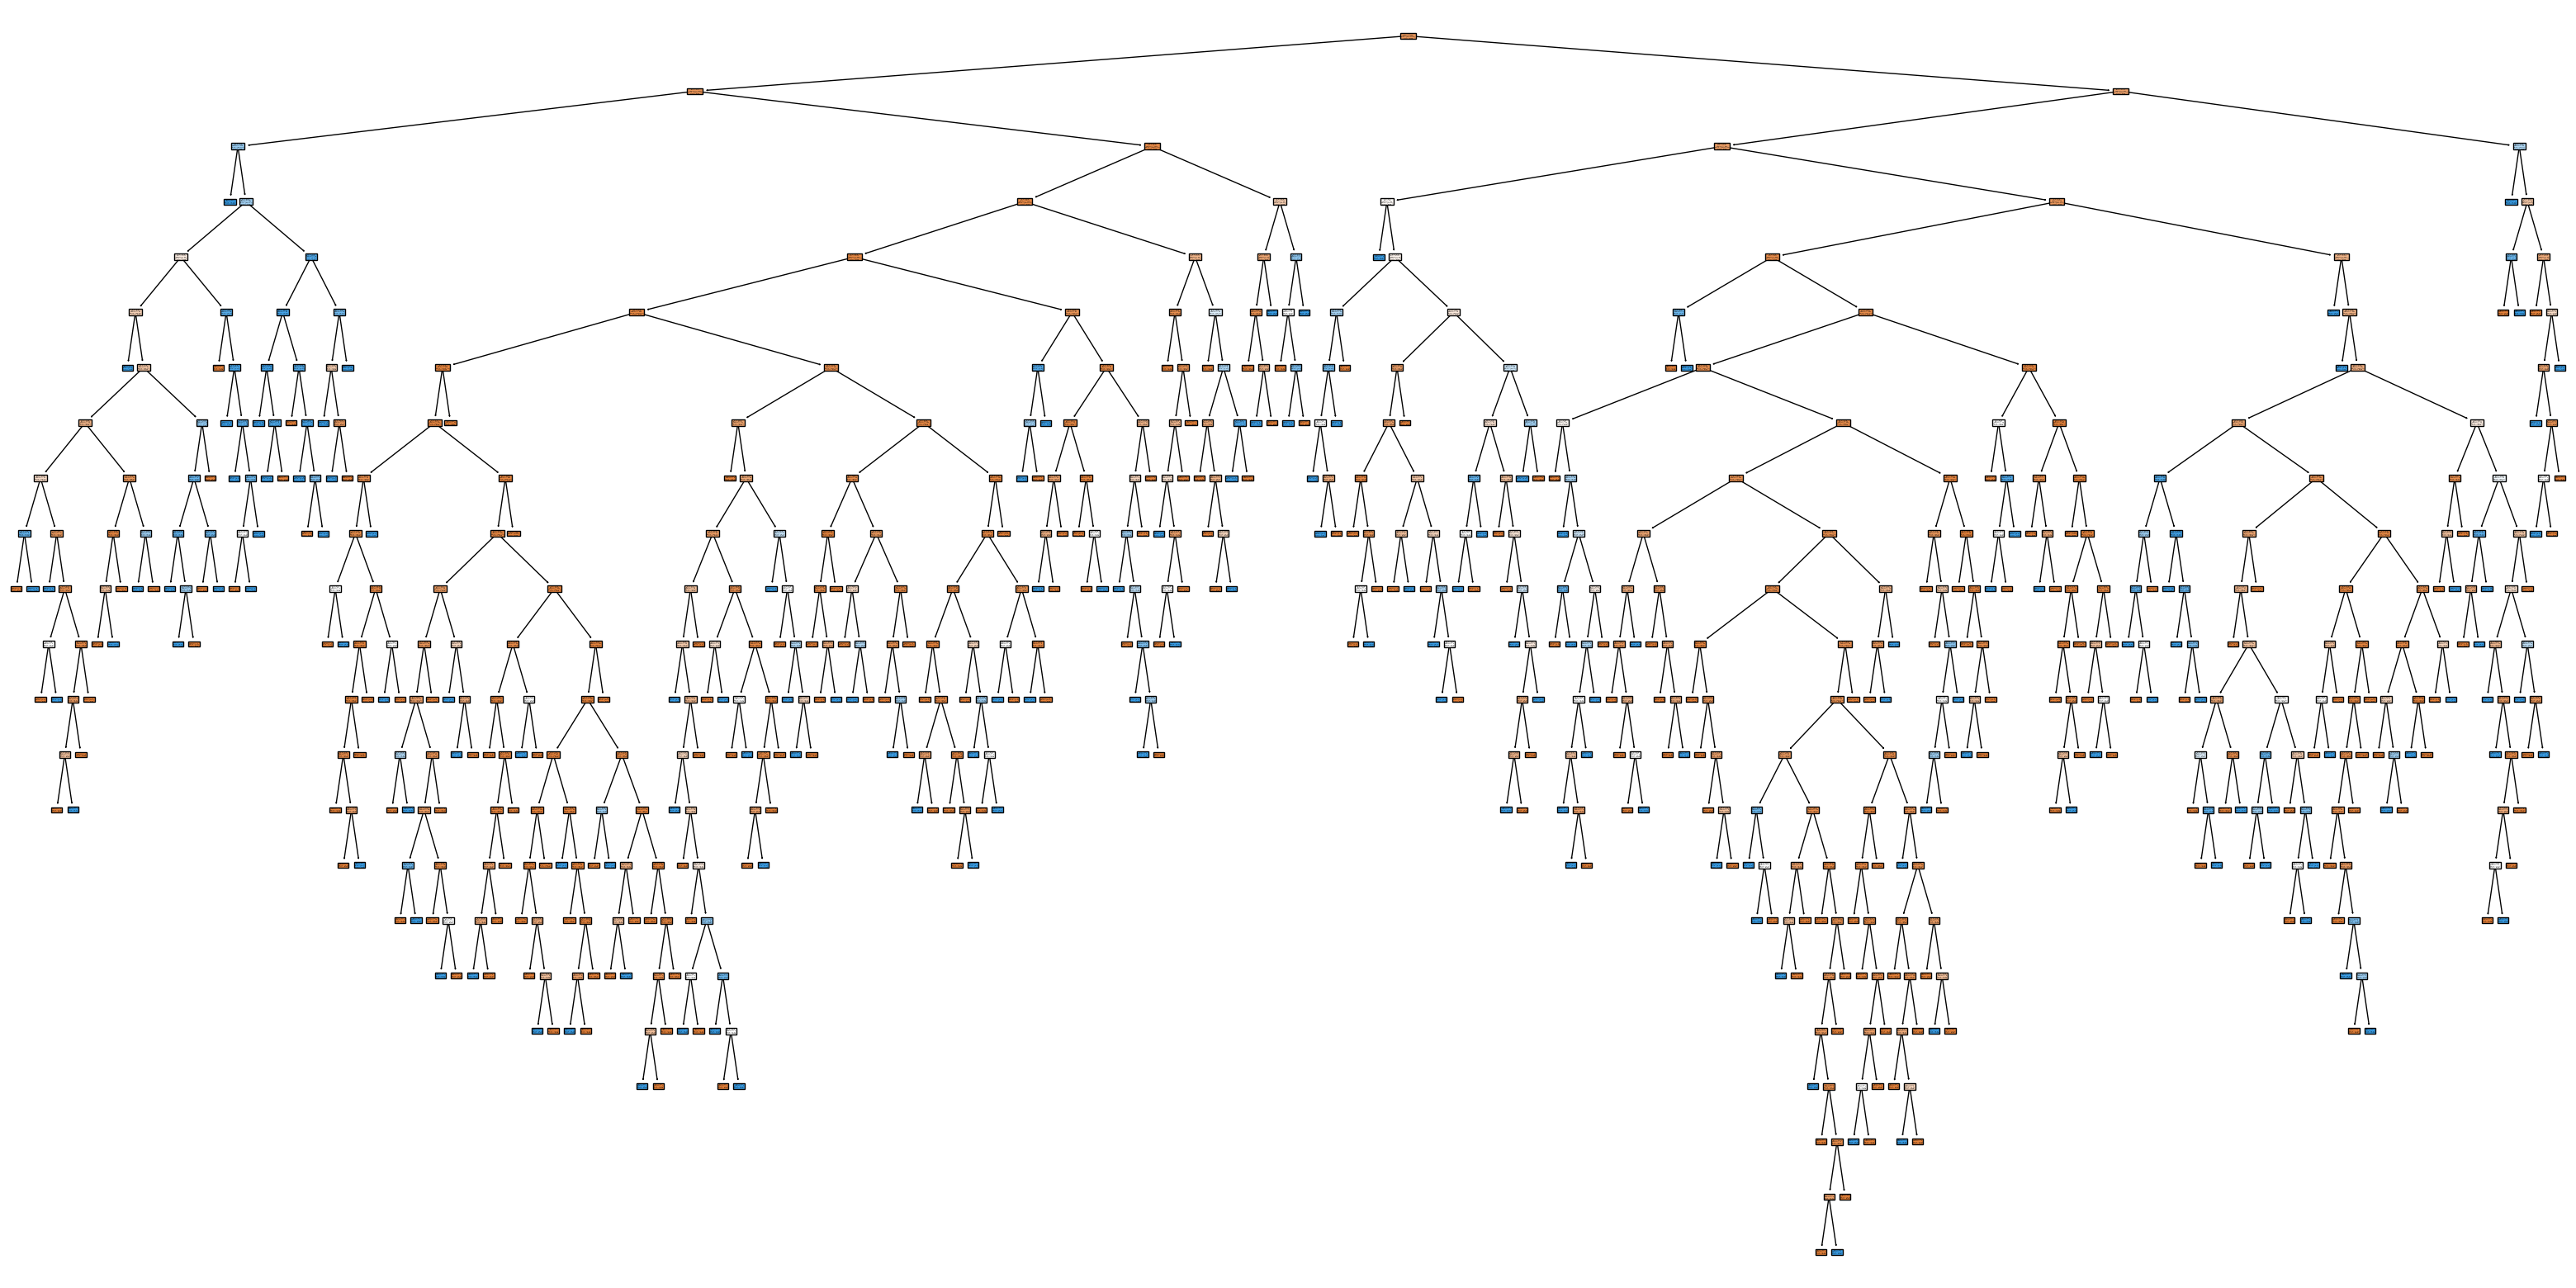

In [59]:
# Assuming x is the feature matrix
plt.figure(figsize=(40, 20))
x_df = pd.DataFrame(x)

# Plotting the first tree from the RandomForestClassifier
plot_tree(rf1.estimators_[0], filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)

# Save the plot to a file 
plt.savefig('Random Forest Classifier Tree 0.png')

# Display the plot
plt.show()

## 6.2 Hyperparameter Tuning

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 70}
--- 2732.2055835723877 seconds
Train score: 0.9391115253184219
Test score: 0.906832298136646
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.84      0.47      0.60       120

    accuracy                           0.91       805
   macro avg       0.87      0.73      0.77       805
weighted avg       0.90      0.91      0.90       805



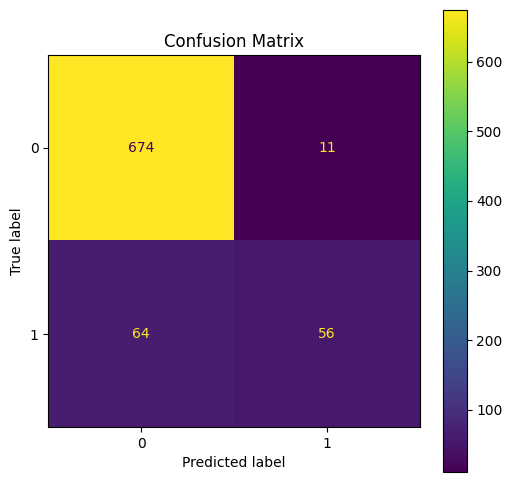

In [63]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(50, 101, 10)),  # Values from 50 to 100 with a step of 10
    'max_depth': list(range(10, 31, 5)),  # Values from 10 to 20 with a step of 5
    'min_samples_split': list(range(5, 21, 2)),  # Values from 5 to 20 with a step of 2
    'min_samples_leaf': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
}

# Initialize the RandomForestClassifier
rf = RandomForestClassifier()

# Start timing
start_time = time.time()

# Create and fit the Random Forest model using GridSearchCV
rf2 = GridSearchCV(rf, param_grid, cv=5)
rf2.fit(x_train, y_train)

# Print the best hyperparameters
print("Best Parameters:", rf2.best_params_)

# Print the time taken for hyperparameter tuning
print("--- %s seconds" % (time.time() - start_time))

# Evaluate on the train set
pred_train = rf2.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Evaluate on the test set
pred_test = rf2.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=rf2.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf2.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

## 6.3 Hyperparameter Tuning - With Scaled Data

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 8, 'min_samples_split': 7, 'n_estimators': 70}
--- 2611.6184344291687 seconds
Train score: 0.9145697421559491
Test score: 0.9180124223602485
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       690
           1       0.85      0.52      0.65       115

    accuracy                           0.92       805
   macro avg       0.89      0.75      0.80       805
weighted avg       0.91      0.92      0.91       805



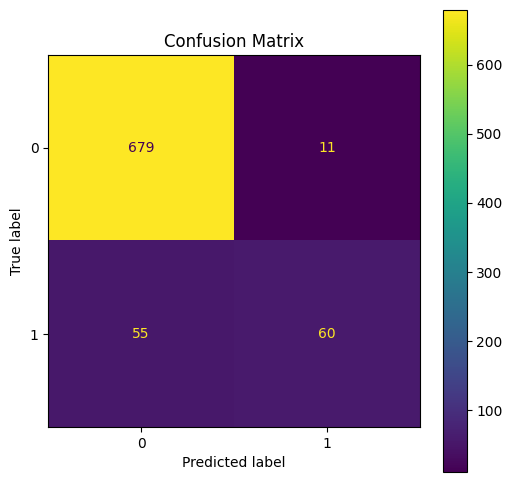

In [64]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': list(range(50, 101, 10)),  # Values from 50 to 100 with a step of 10
    'max_depth': list(range(10, 31, 5)),  # Values from 10 to 20 with a step of 5
    'min_samples_split': list(range(5, 21, 2)),  # Values from 5 to 20 with a step of 2
    'min_samples_leaf': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
}
# Start timing
start_time = time.time()

# Create and fit the Random Forest model using GridSearchCV
final_rf = GridSearchCV(rf, param_grid, cv=5)
final_rf.fit(x_train_scaled, y_train_scaled)

# Print the best hyperparameters
print("Best Parameters:", final_rf.best_params_)

# Print the time taken for hyperparameter tuning
print("--- %s seconds" % (time.time() - start_time))

# Print the classification report
pred_train = final_rf.predict(x_train_scaled)
print(f'Train score: {accuracy_score(y_train_scaled, pred_train)}')

# Evaluate on the test set
pred_test = final_rf.predict(x_test_scaled)
print(f'Test score: {accuracy_score(y_test_scaled, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test_scaled, pred_test, labels=final_rf.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test_scaled, pred_test, labels=final_rf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_rf.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

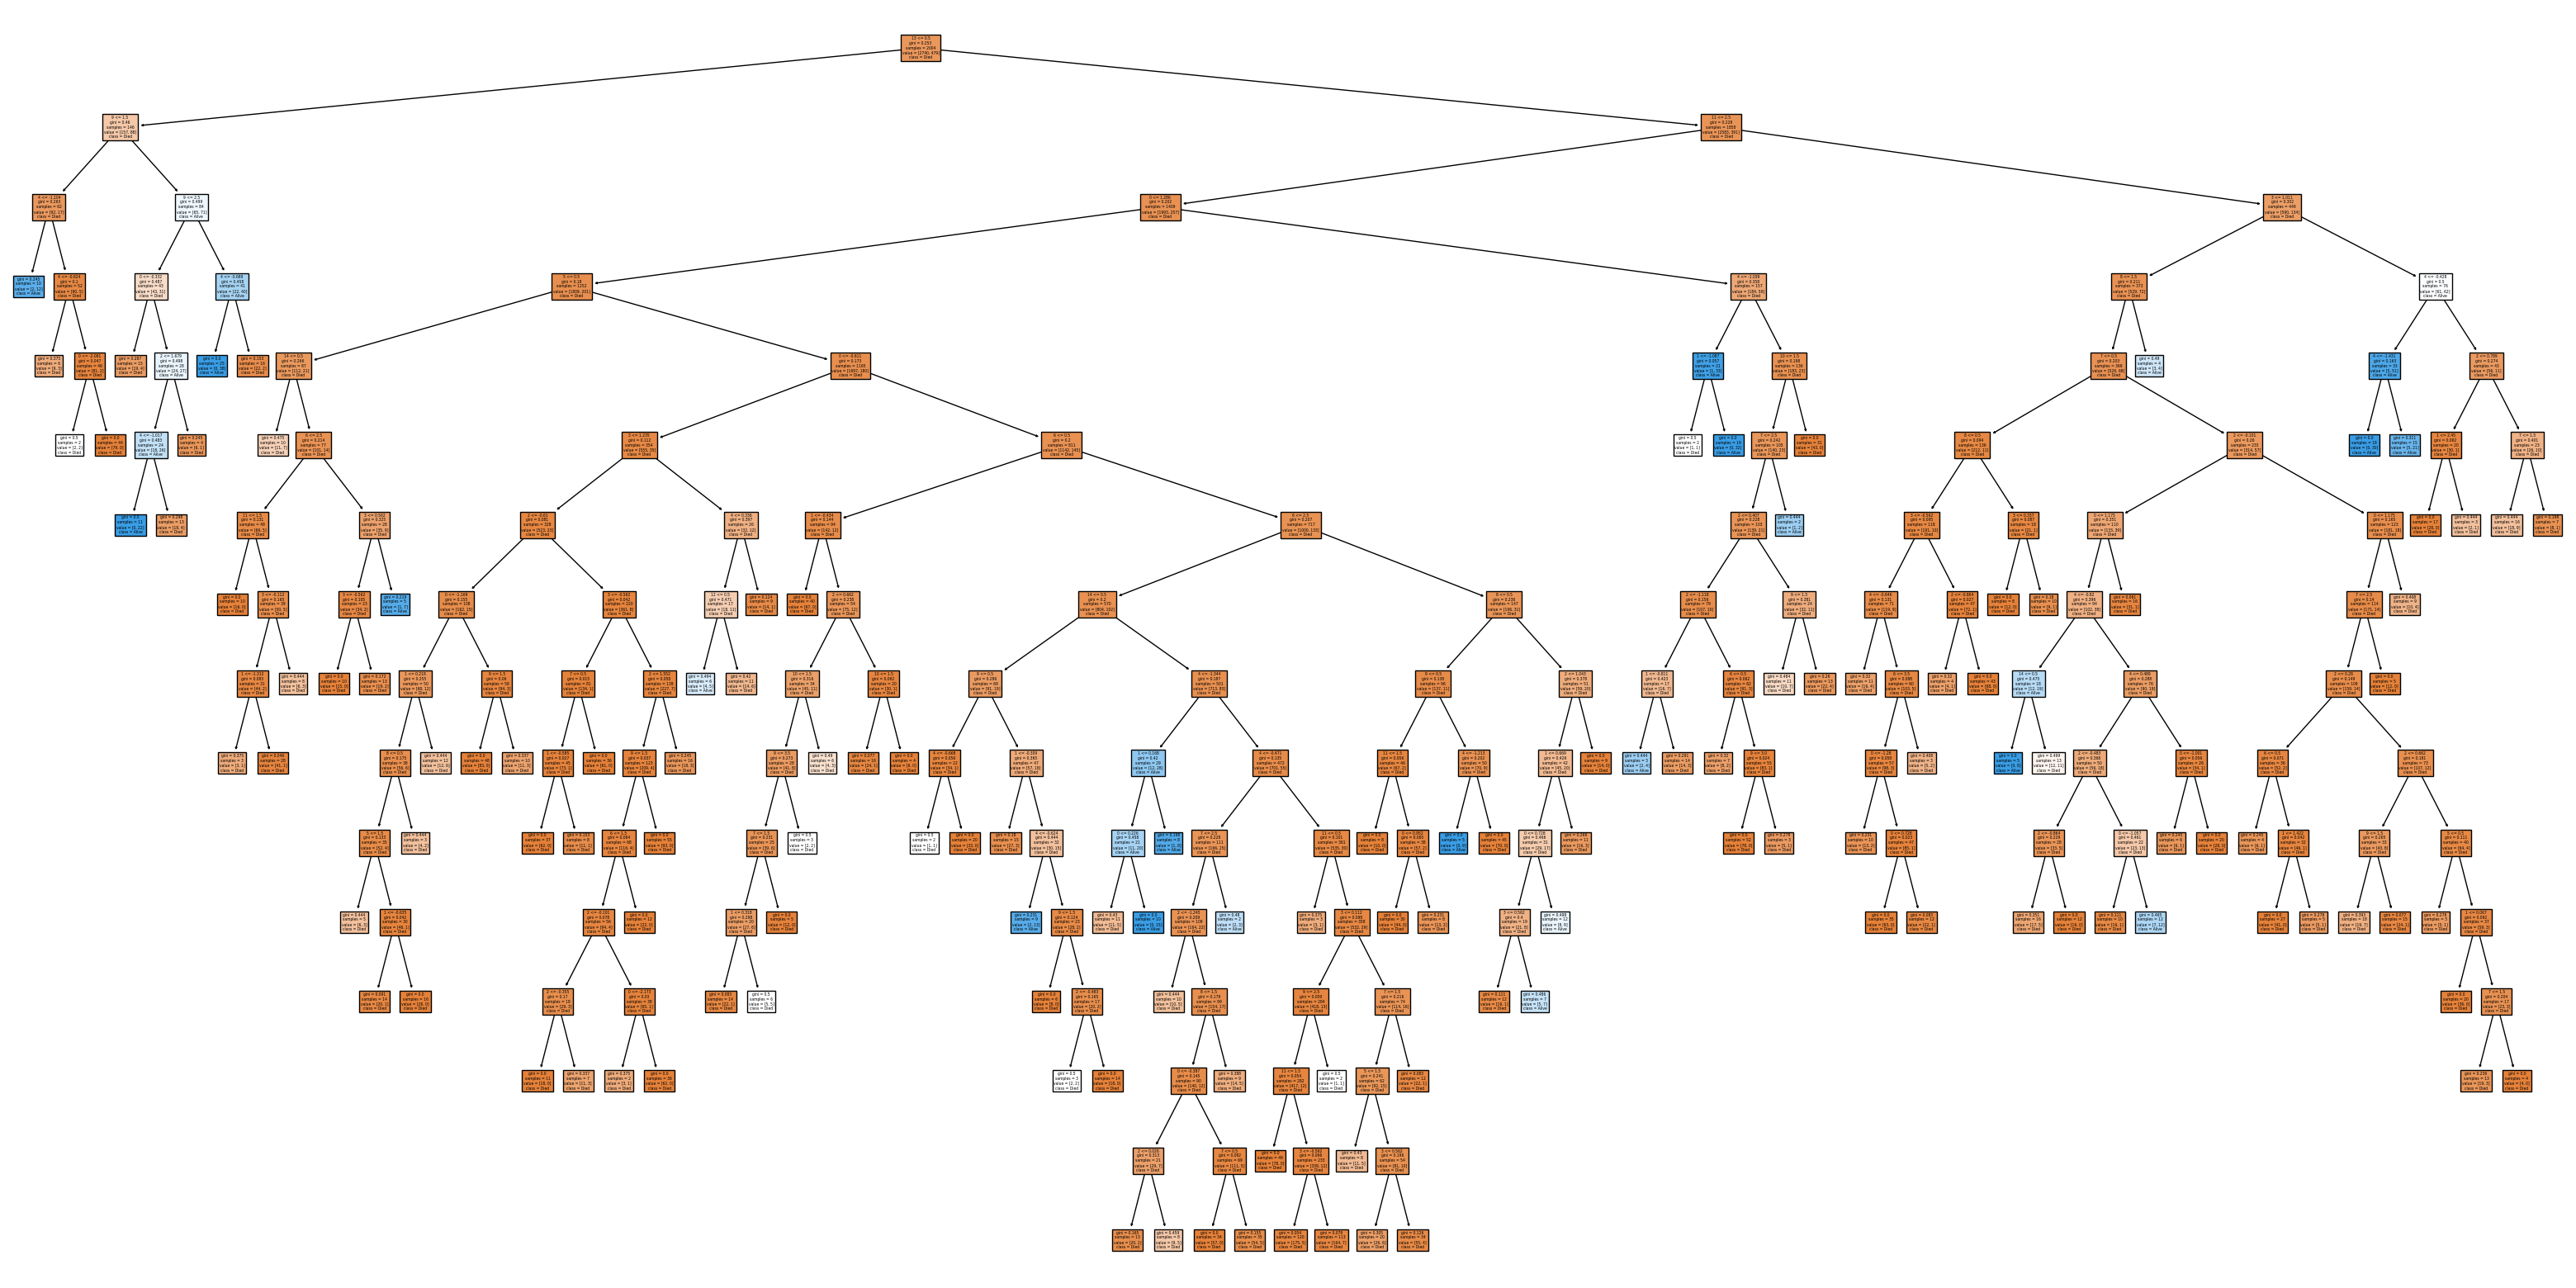

In [40]:
# Assuming x is the feature matrix
plt.figure (figsize=(40,20))
x_df = pd.DataFrame(x)
best_rf = final_rf.best_estimator_

# Then plot the best decision tree
plot_tree(best_rf.estimators_[0], filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)
plt.savefig ('Random Forest Classifier Tree 0 - Hyperparamter')
plt.show()

# 7.0 Extra Tree Classifier
## 7.1 Model Training

In [44]:
#Import Extra Tree Classifier from sc
# Create an Extra Tree Classifier instance
etc1 = ExtraTreeClassifier()
# Train the model using training data
etc1.fit (x_train, y_train)

ExtraTreeClassifier()

In [45]:
# Get the hyperparameters of the Extra Trees Classifier
etc1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'random'}

Train score: 1.0
Test score: 0.8347826086956521
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       685
           1       0.44      0.43      0.44       120

    accuracy                           0.83       805
   macro avg       0.67      0.67      0.67       805
weighted avg       0.83      0.83      0.83       805



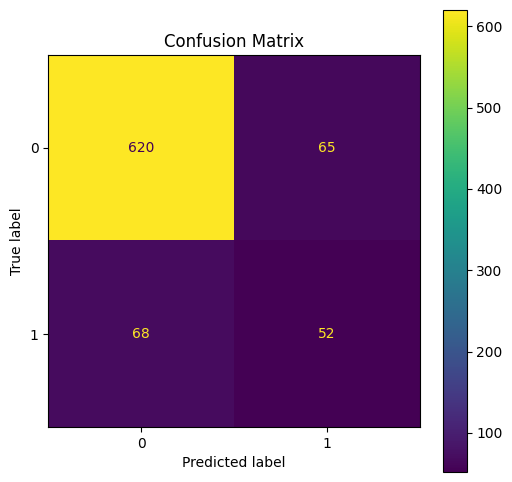

In [46]:
# Predict and evaluate on the training set
pred_train = etc1.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Predict and evaluate on the test set
pred_test = etc1.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=etc1.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=etc1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etc1.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

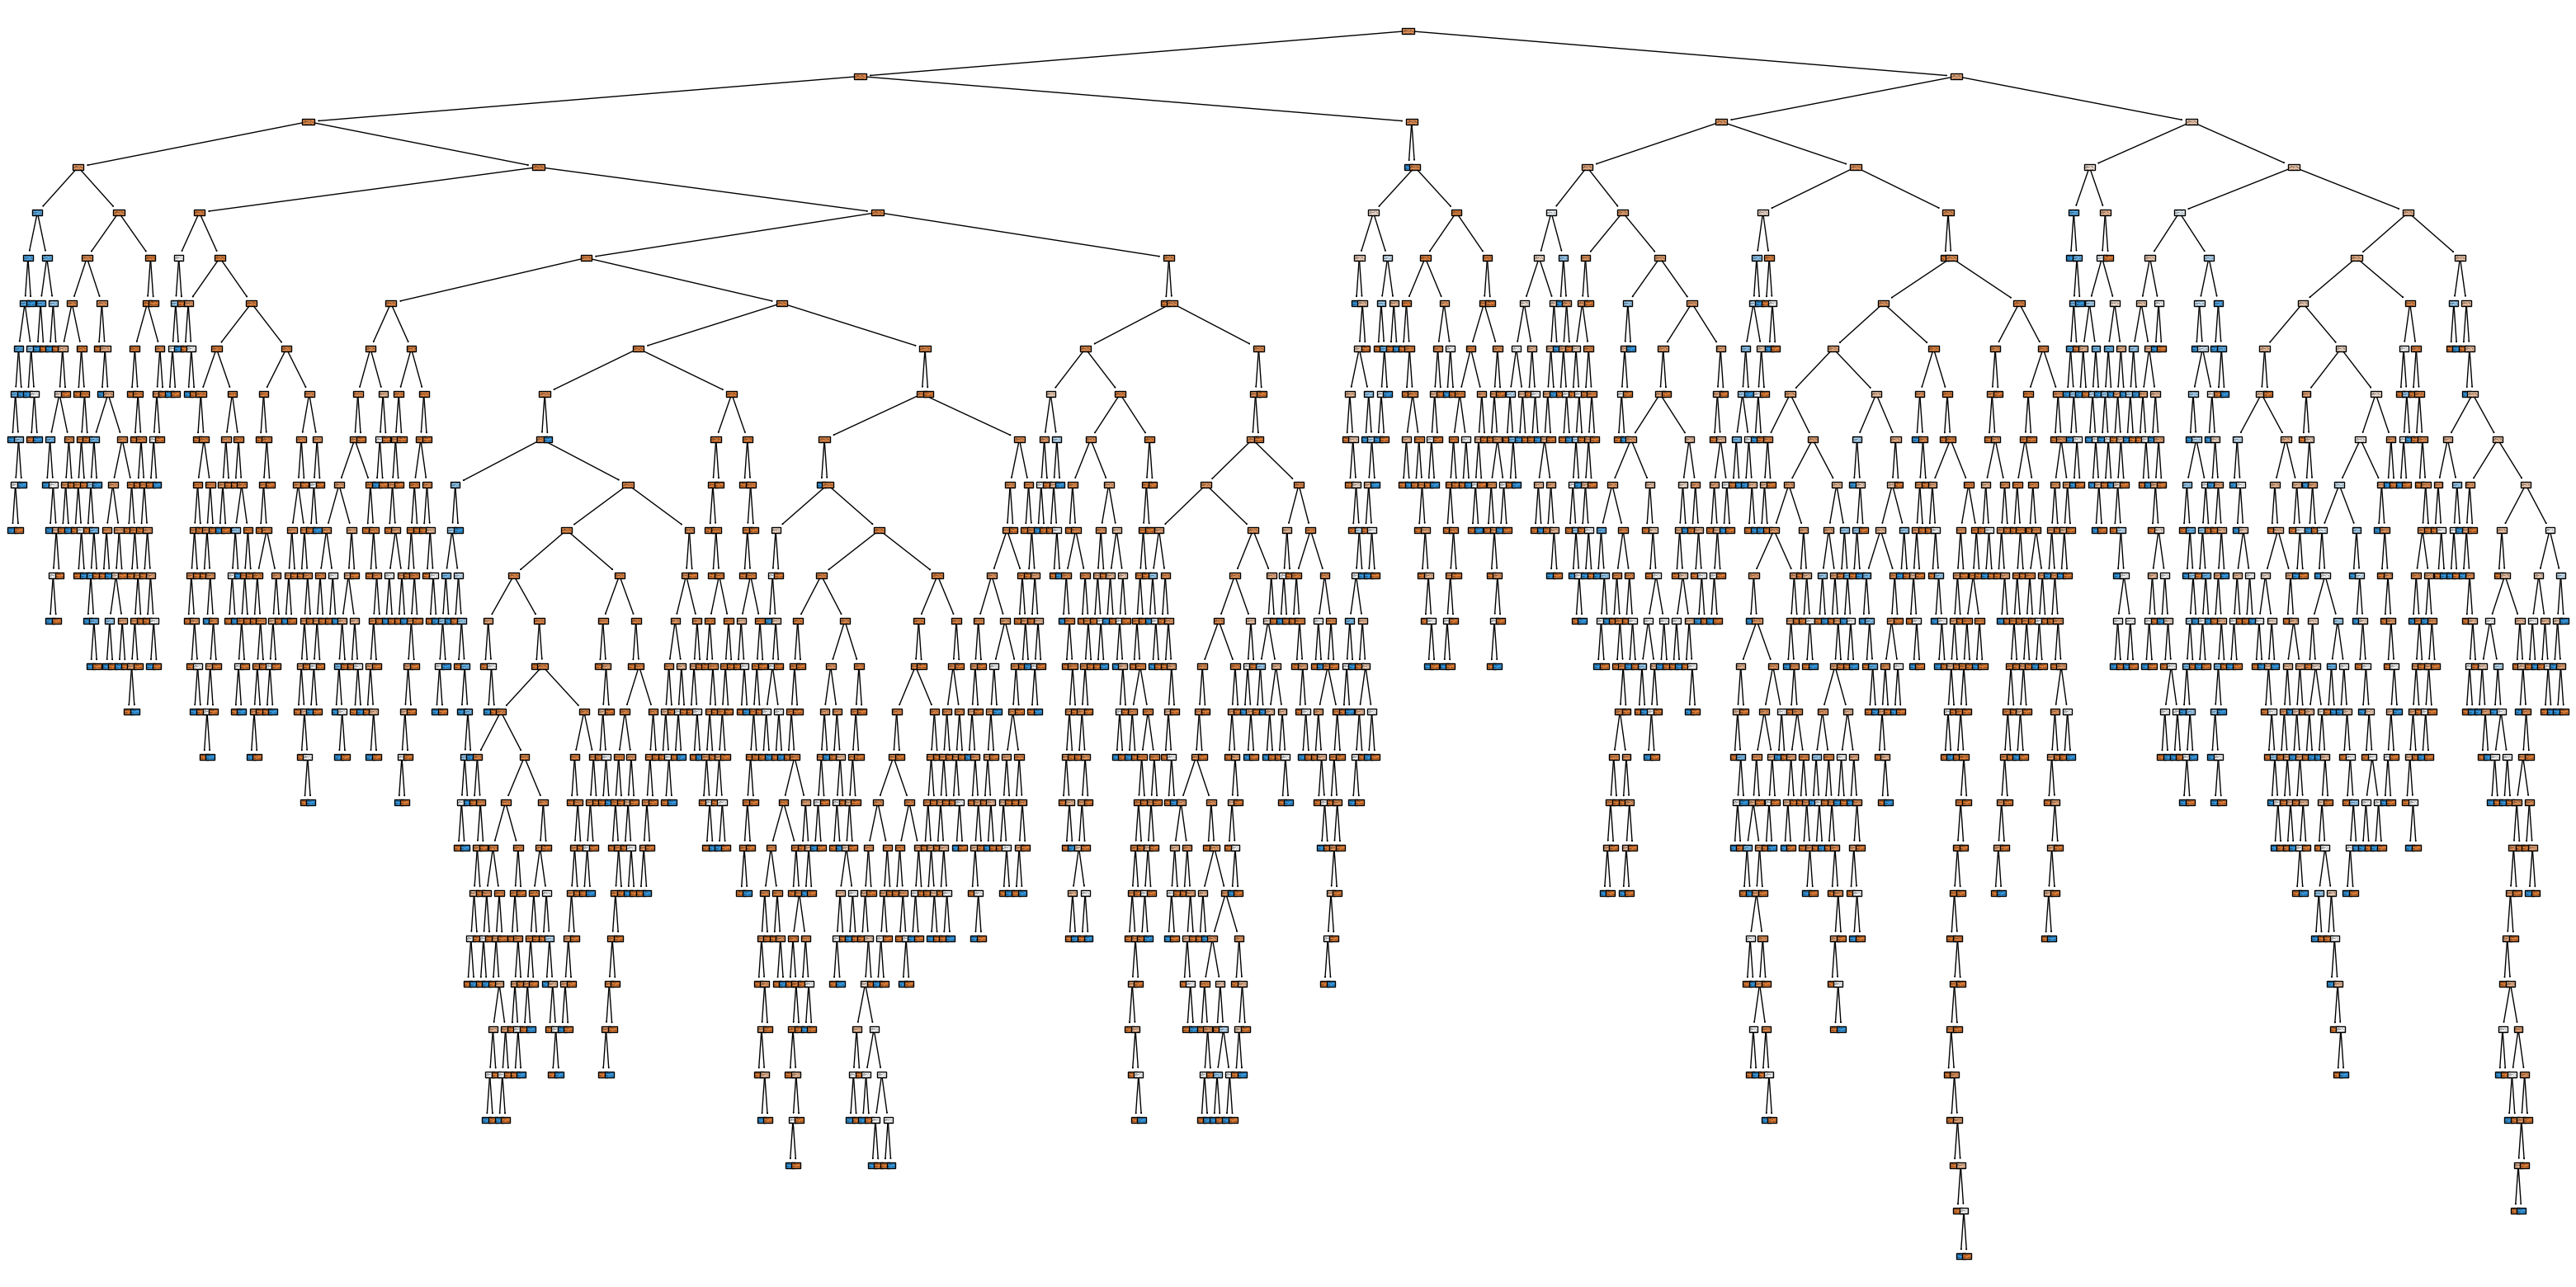

In [41]:
# Set the size of the figure
plt.figure (figsize=(40,20))
# Create a DataFrame for feature names
x_df = pd.DataFrame(x)
# Plot the decision tree
plot_tree (etc1, filled = True, class_names = ['Died', 'Alive'], feature_names = x_df.columns)
# Save the plot as an image
plt.savefig ('Extra Tree Classifier')
# Show the plot
plt.show()

## 7.2 Hyperparameter Tuning

Best Parameters: {'max_depth': 25, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 4}
--- 26.669980764389038 seconds
Train score: 0.8701460080770426
Test score: 0.8571428571428571
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       685
           1       0.55      0.23      0.33       120

    accuracy                           0.86       805
   macro avg       0.71      0.60      0.62       805
weighted avg       0.83      0.86      0.83       805



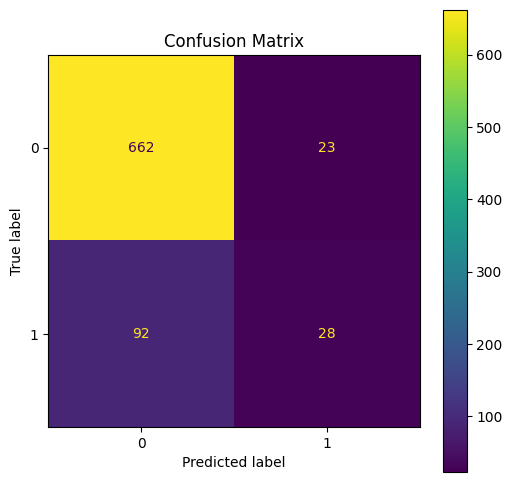

In [47]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': list(range(10, 51, 5)),  # Values from 10 to 50 with a step of 10
    'min_samples_split': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
    'min_samples_leaf': list(range(1, 6)),  # Values from 1 to 5
    'min_impurity_decrease': [i/10.0 for i in range(6)]  # Values from 0.0 to 0.5 with a step of 0.1
}

# Initialize the ExtraTreeClassifier
etc = ExtraTreeClassifier()

# Start timing
start_time = time.time()

# Create and fit the Extra Tree Classifier model using GridSearchCV
etc2 = GridSearchCV(etc, param_grid, cv=5)
etc2.fit(x_train, y_train)

# Print the best hyperparameters and time consumed for Grid Search
print("Best Parameters:", etc2.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Evaluate on the training set
pred_train = etc2.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Evaluate on the training set
pred_test = etc2.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=etc2.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=etc2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=etc2.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

## 7.3 Hyperparameter Tuning - With Scaled Data

Best Parameters: {'max_depth': 30, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 4}
--- 54.60768175125122 seconds
Train score: 0.8800869835352594
Test score: 0.8832298136645963
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       690
           1       0.68      0.35      0.46       115

    accuracy                           0.88       805
   macro avg       0.79      0.66      0.70       805
weighted avg       0.87      0.88      0.87       805



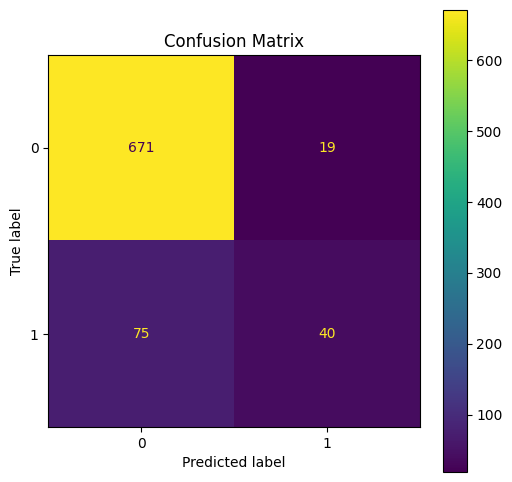

In [48]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'max_depth': list(range(10, 51, 5)),  # Values from 10 to 50 with a step of 10
    'min_samples_split': list(range(2, 21, 2)),  # Values from 2 to 20 with a step of 2
    'min_samples_leaf': list(range(1, 6)),  # Values from 1 to 5
    'min_impurity_decrease': [i/10.0 for i in range(6)]  # Values from 0.0 to 0.5 with a step of 0.1
}

# Start timing
start_time = time.time()

# Create and fit the Extra Tree Classifier model using GridSearchCV
final_etc = GridSearchCV(etc, param_grid, cv=5)
final_etc.fit(x_train_scaled, y_train_scaled)

# Print the best hyperparameters and time consumed for Grid Search
print("Best Parameters:", final_etc.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Evaluate on the training set
pred_train = final_etc.predict(x_train_scaled)
print(f'Train score: {accuracy_score(y_train_scaled, pred_train)}')

# Evaluate on the test set
pred_test = final_etc.predict(x_test_scaled)
print(f'Test score: {accuracy_score(y_test_scaled, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test_scaled, pred_test, labels=final_etc.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test_scaled, pred_test, labels=final_etc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_etc.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

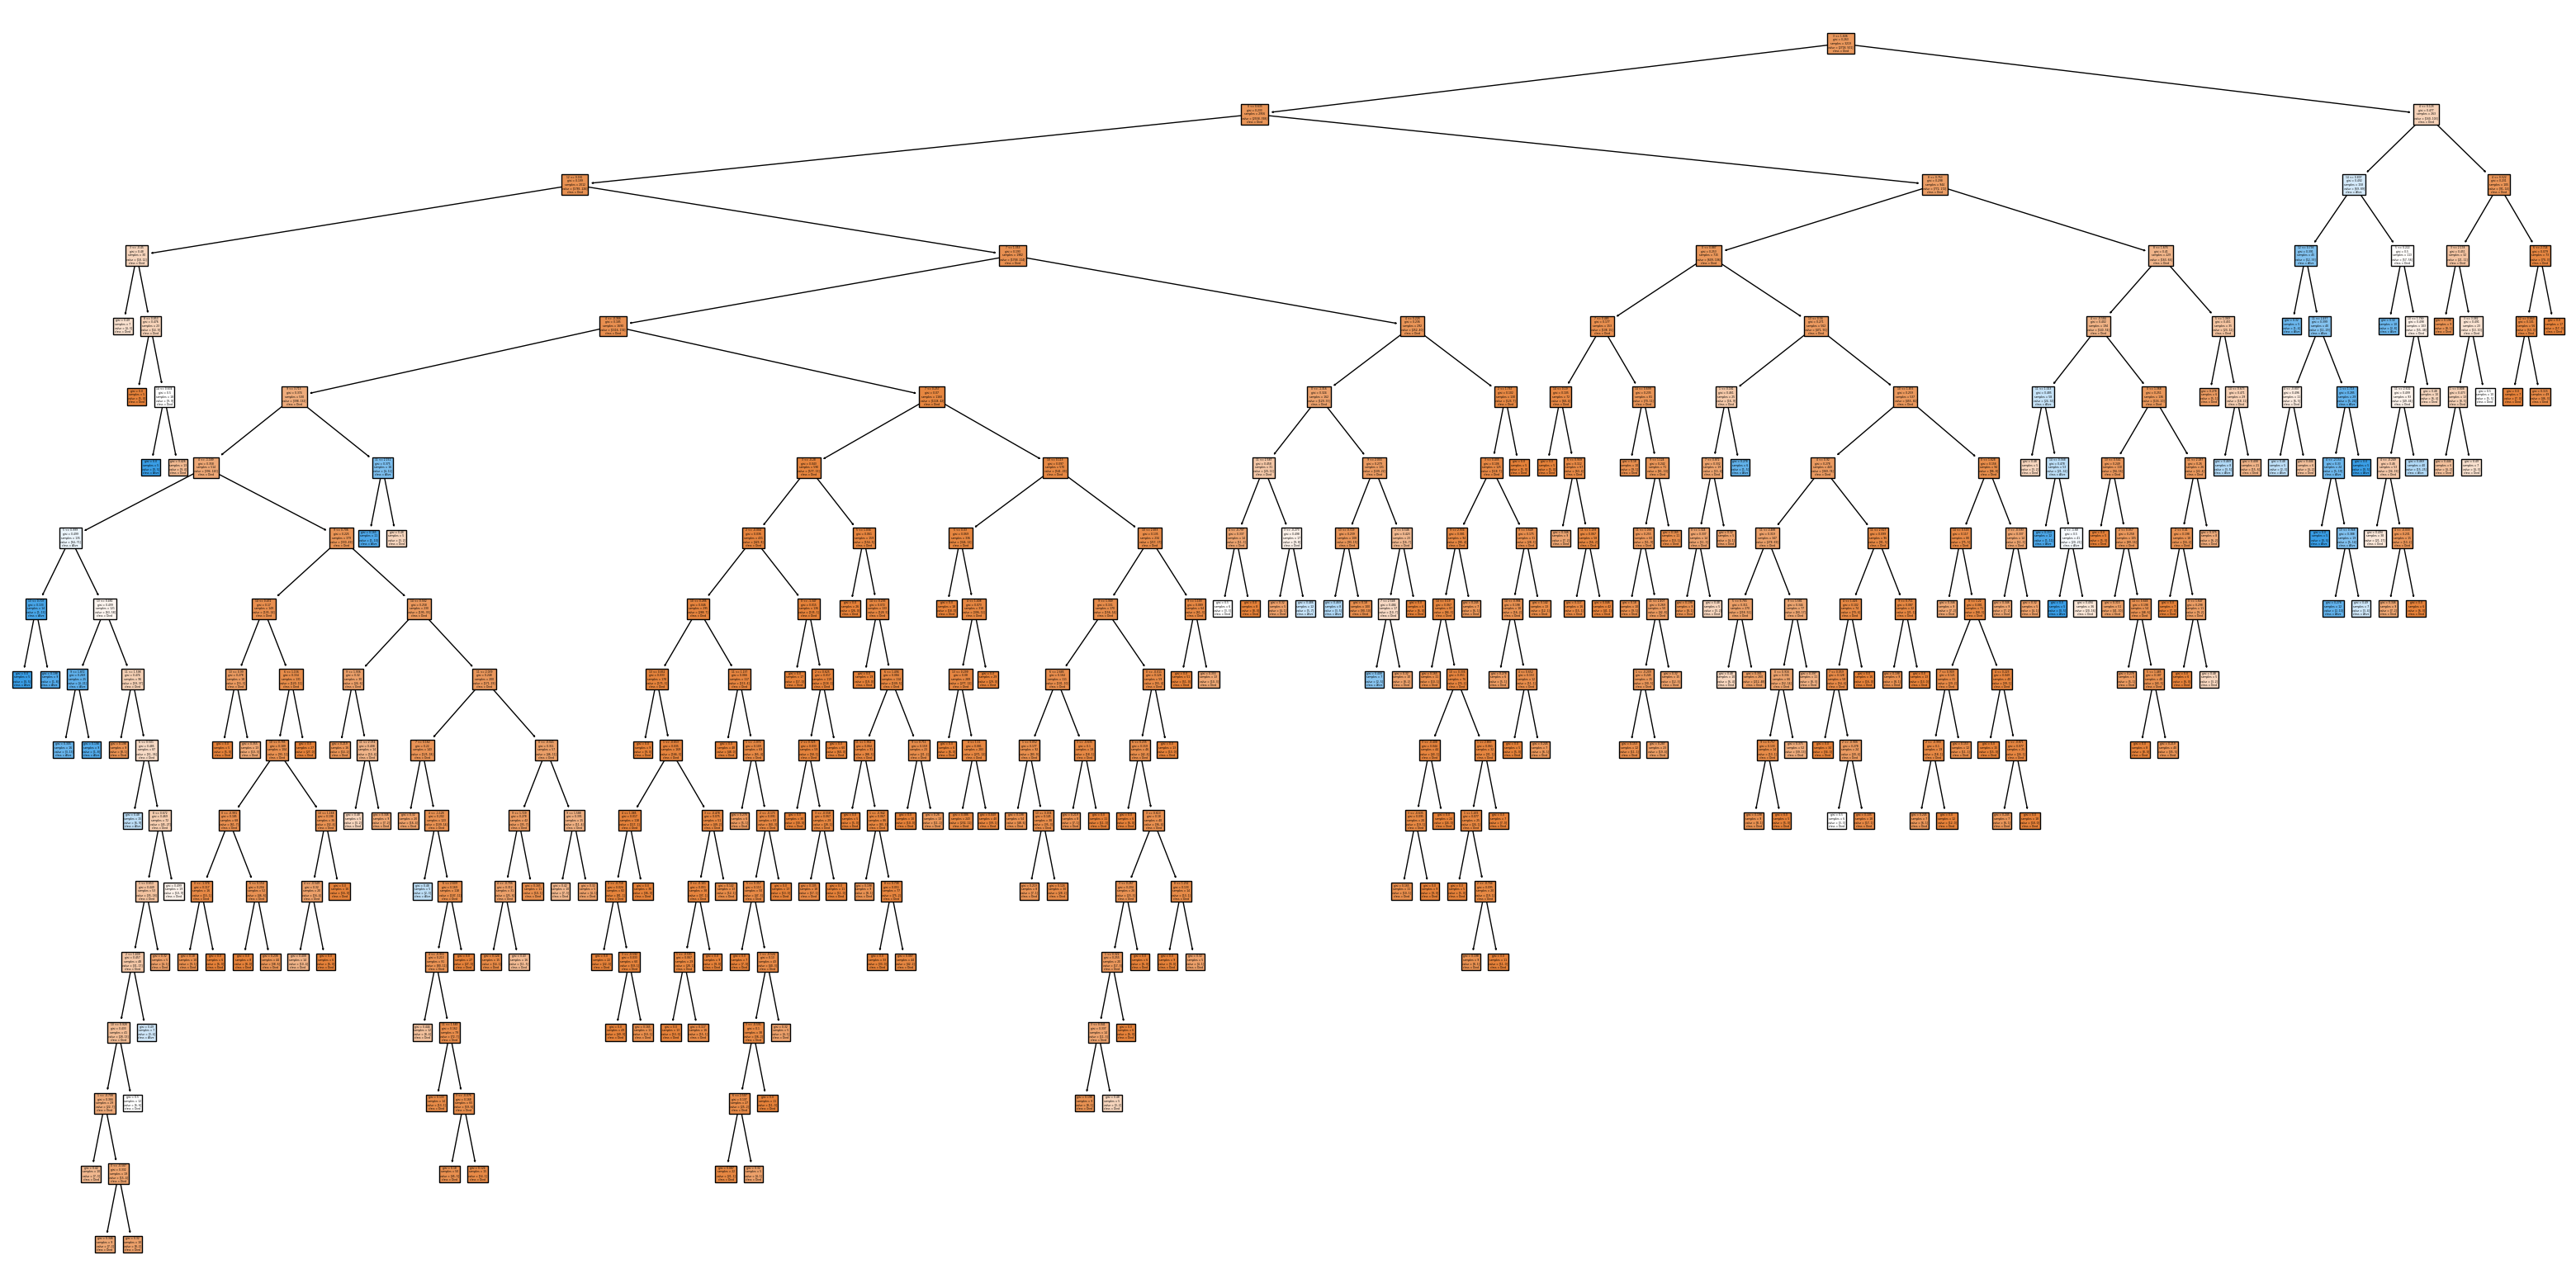

In [49]:
plt.figure (figsize=(40,20))
x_df = pd.DataFrame(x)
# Retrieve the best estimator from the tuned ExtraTreeClassifier
best_etc = final_etc.best_estimator_

# Then plot the best decision tree
plot_tree(best_etc, filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)
plt.savefig ('Extra Tree Classifier - Hyperparamter')
plt.show()

# 8.0 Gradient Boosting Classifier
# 8.1 Model Training

In [50]:
# initializing a Gradient Boosting Classifier
gbc1 = GradientBoostingClassifier()

In [51]:
# Fit the data
gbc1.fit(x_train,y_train)
# Get the hyperparameters of the Gradient Boosting Classifier
gbc1.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Train score: 0.9276172724448587
Test score: 0.9080745341614906
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       685
           1       0.84      0.47      0.61       120

    accuracy                           0.91       805
   macro avg       0.88      0.73      0.78       805
weighted avg       0.90      0.91      0.90       805



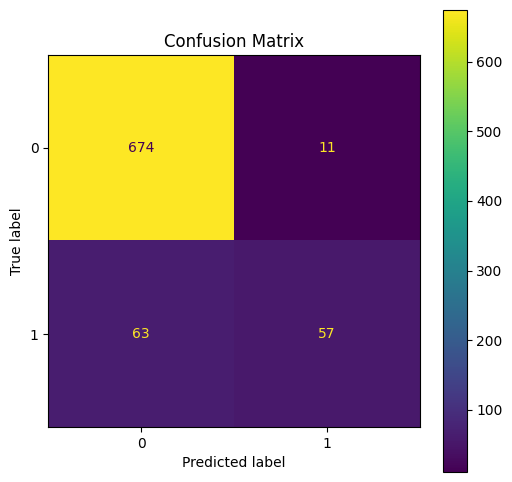

In [52]:
# Predict and evaluate on the training set
pred_train = gbc1.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Predict and evaluate on the test set
pred_test = gbc1.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=gbc1.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=gbc1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc1.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

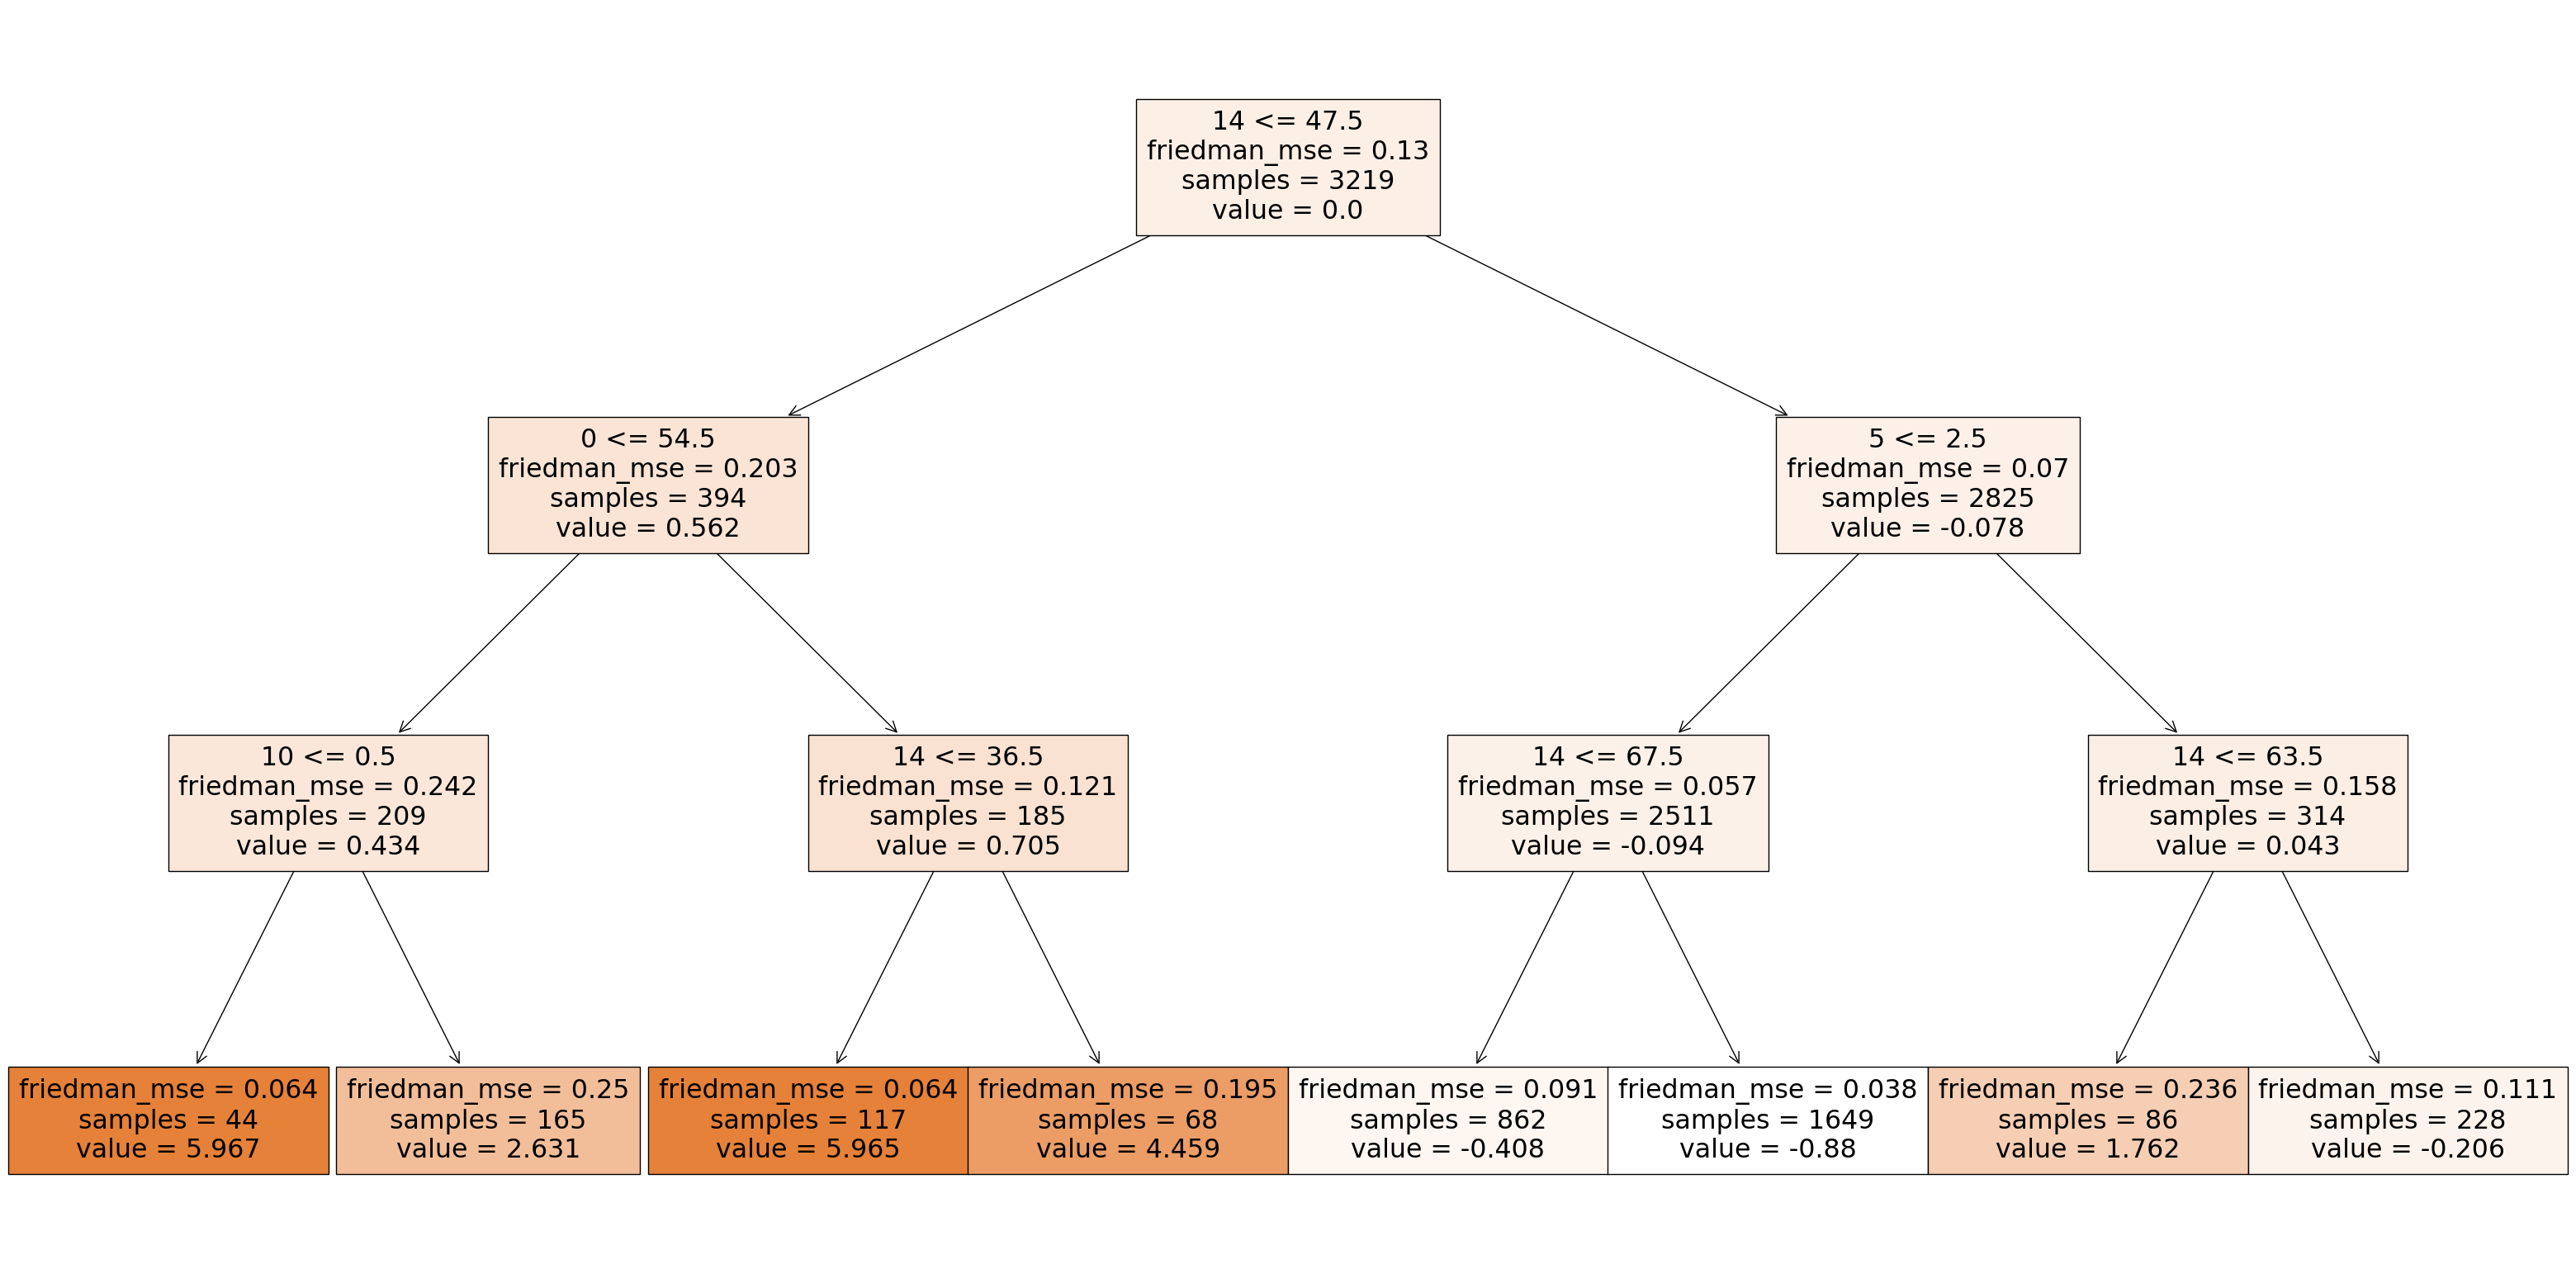

In [53]:
# Assuming x is the feature matrix
plt.figure(figsize=(40, 20))
x_df = pd.DataFrame(x)

# Plotting the first tree from the RandomForestClassifier
plot_tree(gbc1.estimators_[0,0], filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)

# Save the plot to a file 
plt.savefig('Gradient Boosting Classifier Tree 0.png')

# Display the plot
plt.show()

## 8.2 Hyperparameter Tuning

Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'min_samples_leaf': 12, 'min_samples_split': 20, 'n_estimators': 50, 'subsample': 1.0}
--- 1732.4585809707642 seconds
Train score: 0.9996893445169307
Test score: 0.906832298136646
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       685
           1       0.79      0.51      0.62       120

    accuracy                           0.91       805
   macro avg       0.86      0.74      0.78       805
weighted avg       0.90      0.91      0.90       805



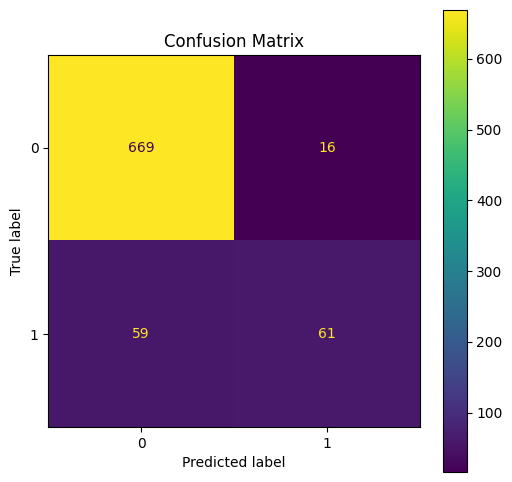

In [54]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],  # Example values
    'subsample': [0.5, 1.0],  # Example values
    'n_estimators': list(range(50, 101, 20)),  # Values from 50 to 100 with a step of 10
    'max_depth': list(range(10, 31, 10)),  # Values from 10 to 30 with a step of 10
    'min_samples_split': list(range(5, 21, 5)),  # Values from 5 to 20 with a step of 5
    'min_samples_leaf': list(range(2, 21, 10)),  # Values from 2 to 20 with a step of 2
}

# Initialize the Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Start timing
start_time = time.time()

# Create and fit the Random Forest model using GridSearchCV
gbc2 = GridSearchCV(gbc, param_grid, cv=5)
gbc2.fit(x_train, y_train)

# Print the best hyperparameters and time consumed for Grid Search
print("Best Parameters:", gbc2.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Evaluate on the training set
pred_train = gbc2.predict(x_train)
print(f'Train score: {accuracy_score(y_train, pred_train)}')

# Evaluate on the test set
pred_test = gbc2.predict(x_test)
print(f'Test score: {accuracy_score(y_test, pred_test)}')

# ======================================================

# Display classification report for the test set
print(classification_report(y_test, pred_test, labels=gbc2.classes_.tolist()))

# ======================================================

# Display confusion matrix for the test set
cm = confusion_matrix(y_test, pred_test, labels=gbc2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc2.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

## 8.3 Hyperparameter Tuning - With Scaled Data

Best Parameters: {'learning_rate': 0.1, 'max_depth': 30, 'min_samples_leaf': 12, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 1.0}
--- 1672.0083379745483 seconds
Train score: 1.0
Test score: 0.9130434782608695
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       690
           1       0.76      0.57      0.65       115

    accuracy                           0.91       805
   macro avg       0.85      0.77      0.80       805
weighted avg       0.91      0.91      0.91       805



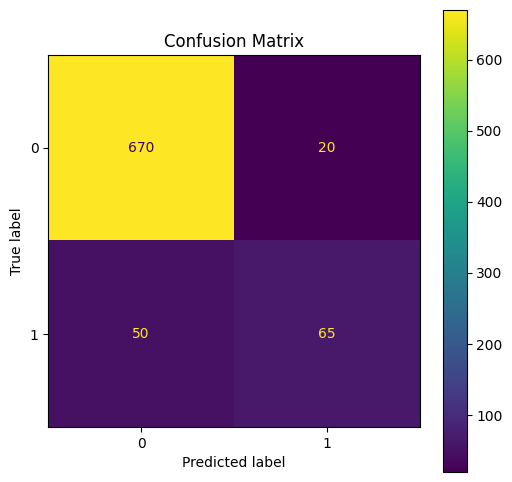

In [55]:
# Define hyperparameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1],  # Example values
    'subsample': [0.5, 1.0],  # Example values
    'n_estimators': list(range(50, 101, 20)),  # Values from 50 to 100 with a step of 10
    'max_depth': list(range(10, 31, 10)),  # Values from 10 to 30 with a step of 10
    'min_samples_split': list(range(5, 21, 5)),  # Values from 5 to 20 with a step of 5
    'min_samples_leaf': list(range(2, 21, 10)),  # Values from 2 to 20 with a step of 2
}

# Start timing
start_time = time.time()

# Create and fit the Random Forest model using GridSearchCV
final_gbc = GridSearchCV(gbc, param_grid, cv=5)
final_gbc.fit(x_train_scaled, y_train_scaled)

# Print the best hyperparameters and time consumed for Grid Search
print("Best Parameters:", final_gbc.best_params_)
print("--- %s seconds" % (time.time() - start_time))

# Evaluate on the scaled training set
pred_train = final_gbc.predict(x_train_scaled)
print(f'Train score: {accuracy_score(y_train_scaled, pred_train)}')

# Evaluate on the scaled test set
pred_test = final_gbc.predict(x_test_scaled)
print(f'Test score: {accuracy_score(y_test_scaled, pred_test)}')

# ======================================================

# Display classification report for the scaled test set
print(classification_report(y_test_scaled, pred_test, labels=final_gbc.classes_.tolist()))

# ======================================================

# Display confusion matrix for the scaled test set
cm = confusion_matrix(y_test_scaled, pred_test, labels=final_gbc.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_gbc.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
ax.set_title('Confusion Matrix')
disp.plot(ax=ax)
plt.show()

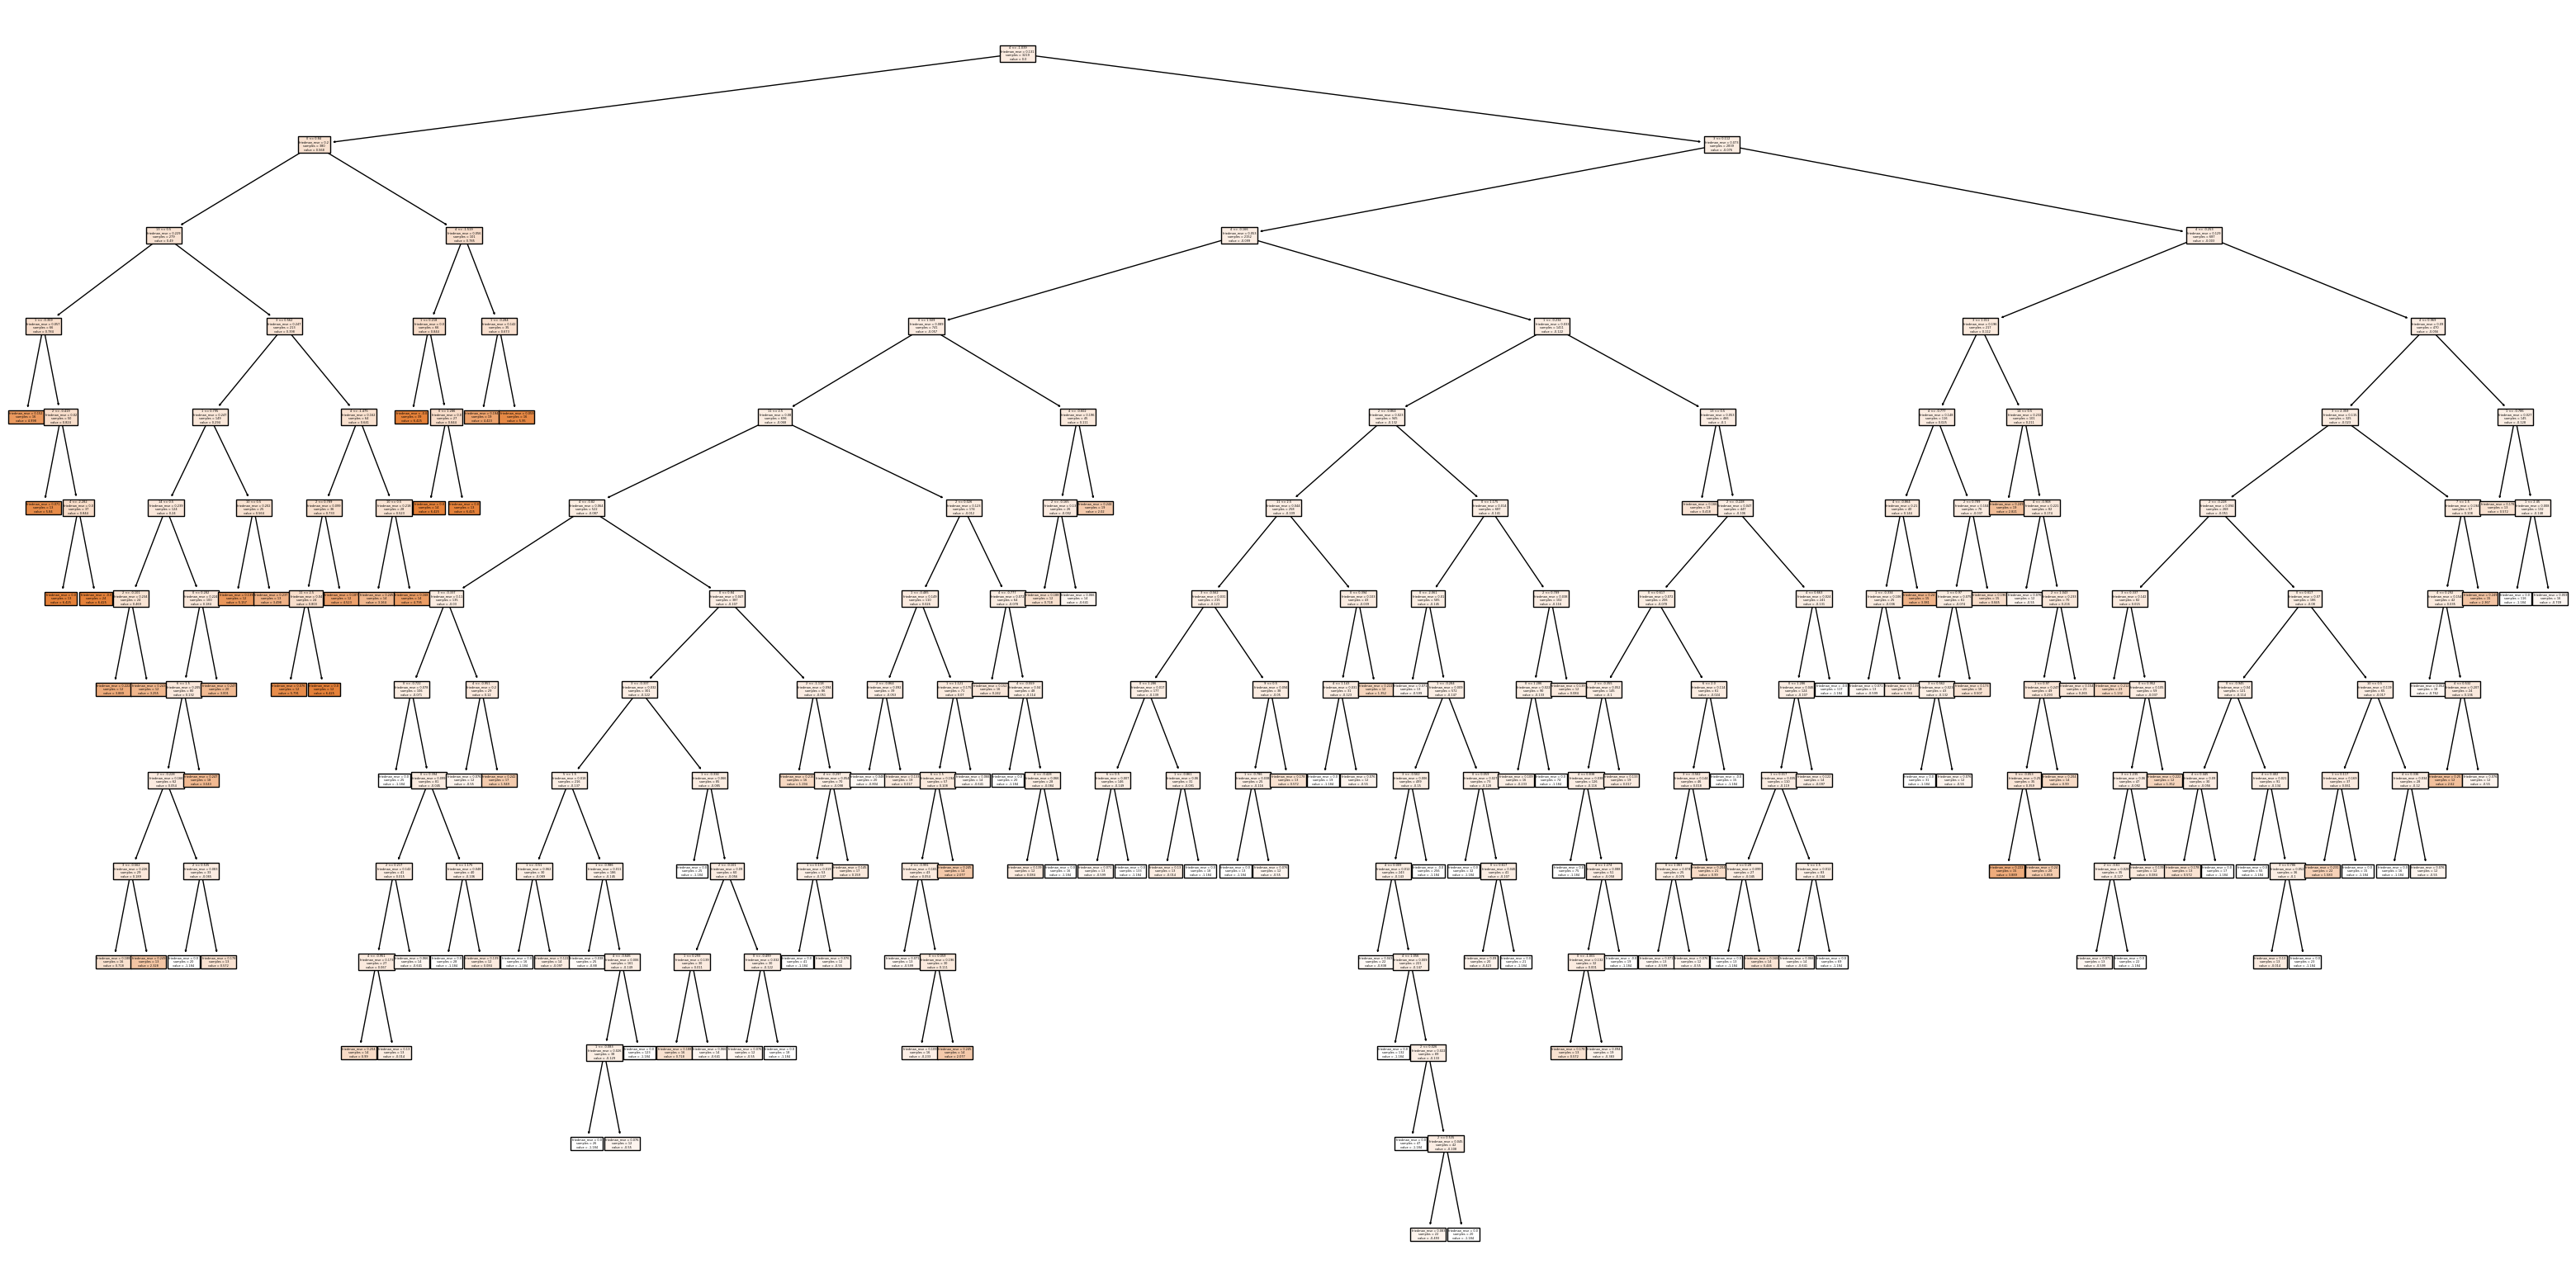

In [60]:
# Assuming x is the feature matrix
plt.figure (figsize=(40,20))
x_df = pd.DataFrame(x)
best_gbc = final_gbc.best_estimator_

# Then plot the best decision tree
plot_tree(best_gbc.estimators_[0,0], filled=True, class_names=['Died', 'Alive'], feature_names=x_df.columns)
plt.savefig ('Gradient Boosting Classifier Tree 0 - Hyperparamter')
plt.show()

## 9.0 Comparison of Model 

## 9.1 Precision

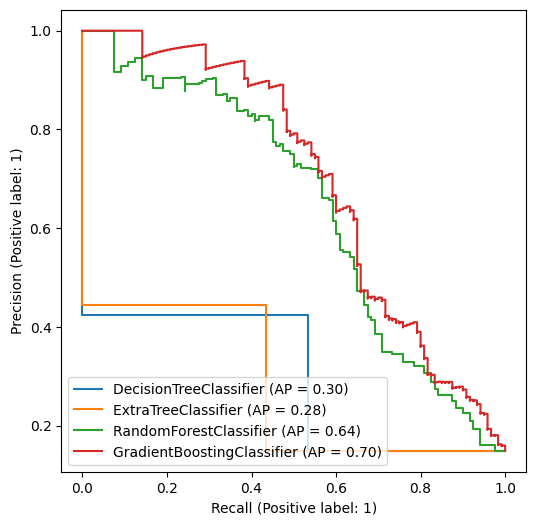

In [65]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
# Plot Precision-Recall curve for Decision Tree
PrecisionRecallDisplay.from_estimator(dtc1, x_test, y_test, ax=ax)
# Plot Precision-Recall curve for Extra Tree
PrecisionRecallDisplay.from_estimator(etc1, x_test, y_test, ax=ax)
# Plot Precision-Recall curve for Random Forest
PrecisionRecallDisplay.from_estimator(rf1, x_test, y_test, ax=ax)
# Plot Precision-Recall curve for Gradient Boosting
PrecisionRecallDisplay.from_estimator(gbc1, x_test, y_test, ax=ax)

## 9.2 Comparison of precision - Hyperparameter Tuning (Scaled Data)

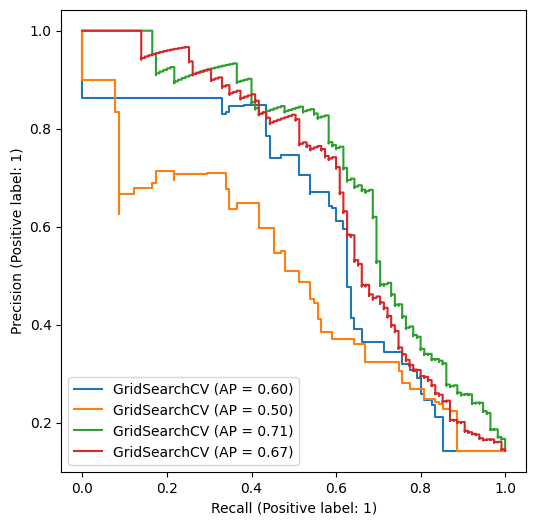

In [66]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
# Plot Precision-Recall curve for Decision Tree
PrecisionRecallDisplay.from_estimator(final_dtc, x_test_scaled, y_test_scaled, ax=ax)
# Plot Precision-Recall curve for Extra Tree
PrecisionRecallDisplay.from_estimator(final_etc, x_test_scaled, y_test_scaled, ax=ax)
# Plot Precision-Recall curve for Random Forest
PrecisionRecallDisplay.from_estimator(final_rf, x_test_scaled, y_test_scaled, ax=ax)
# Plot Precision-Recall curve for Gradient Boosting
PrecisionRecallDisplay.from_estimator(final_gbc, x_test_scaled, y_test_scaled, ax=ax)

# 10.0 Feature Importance

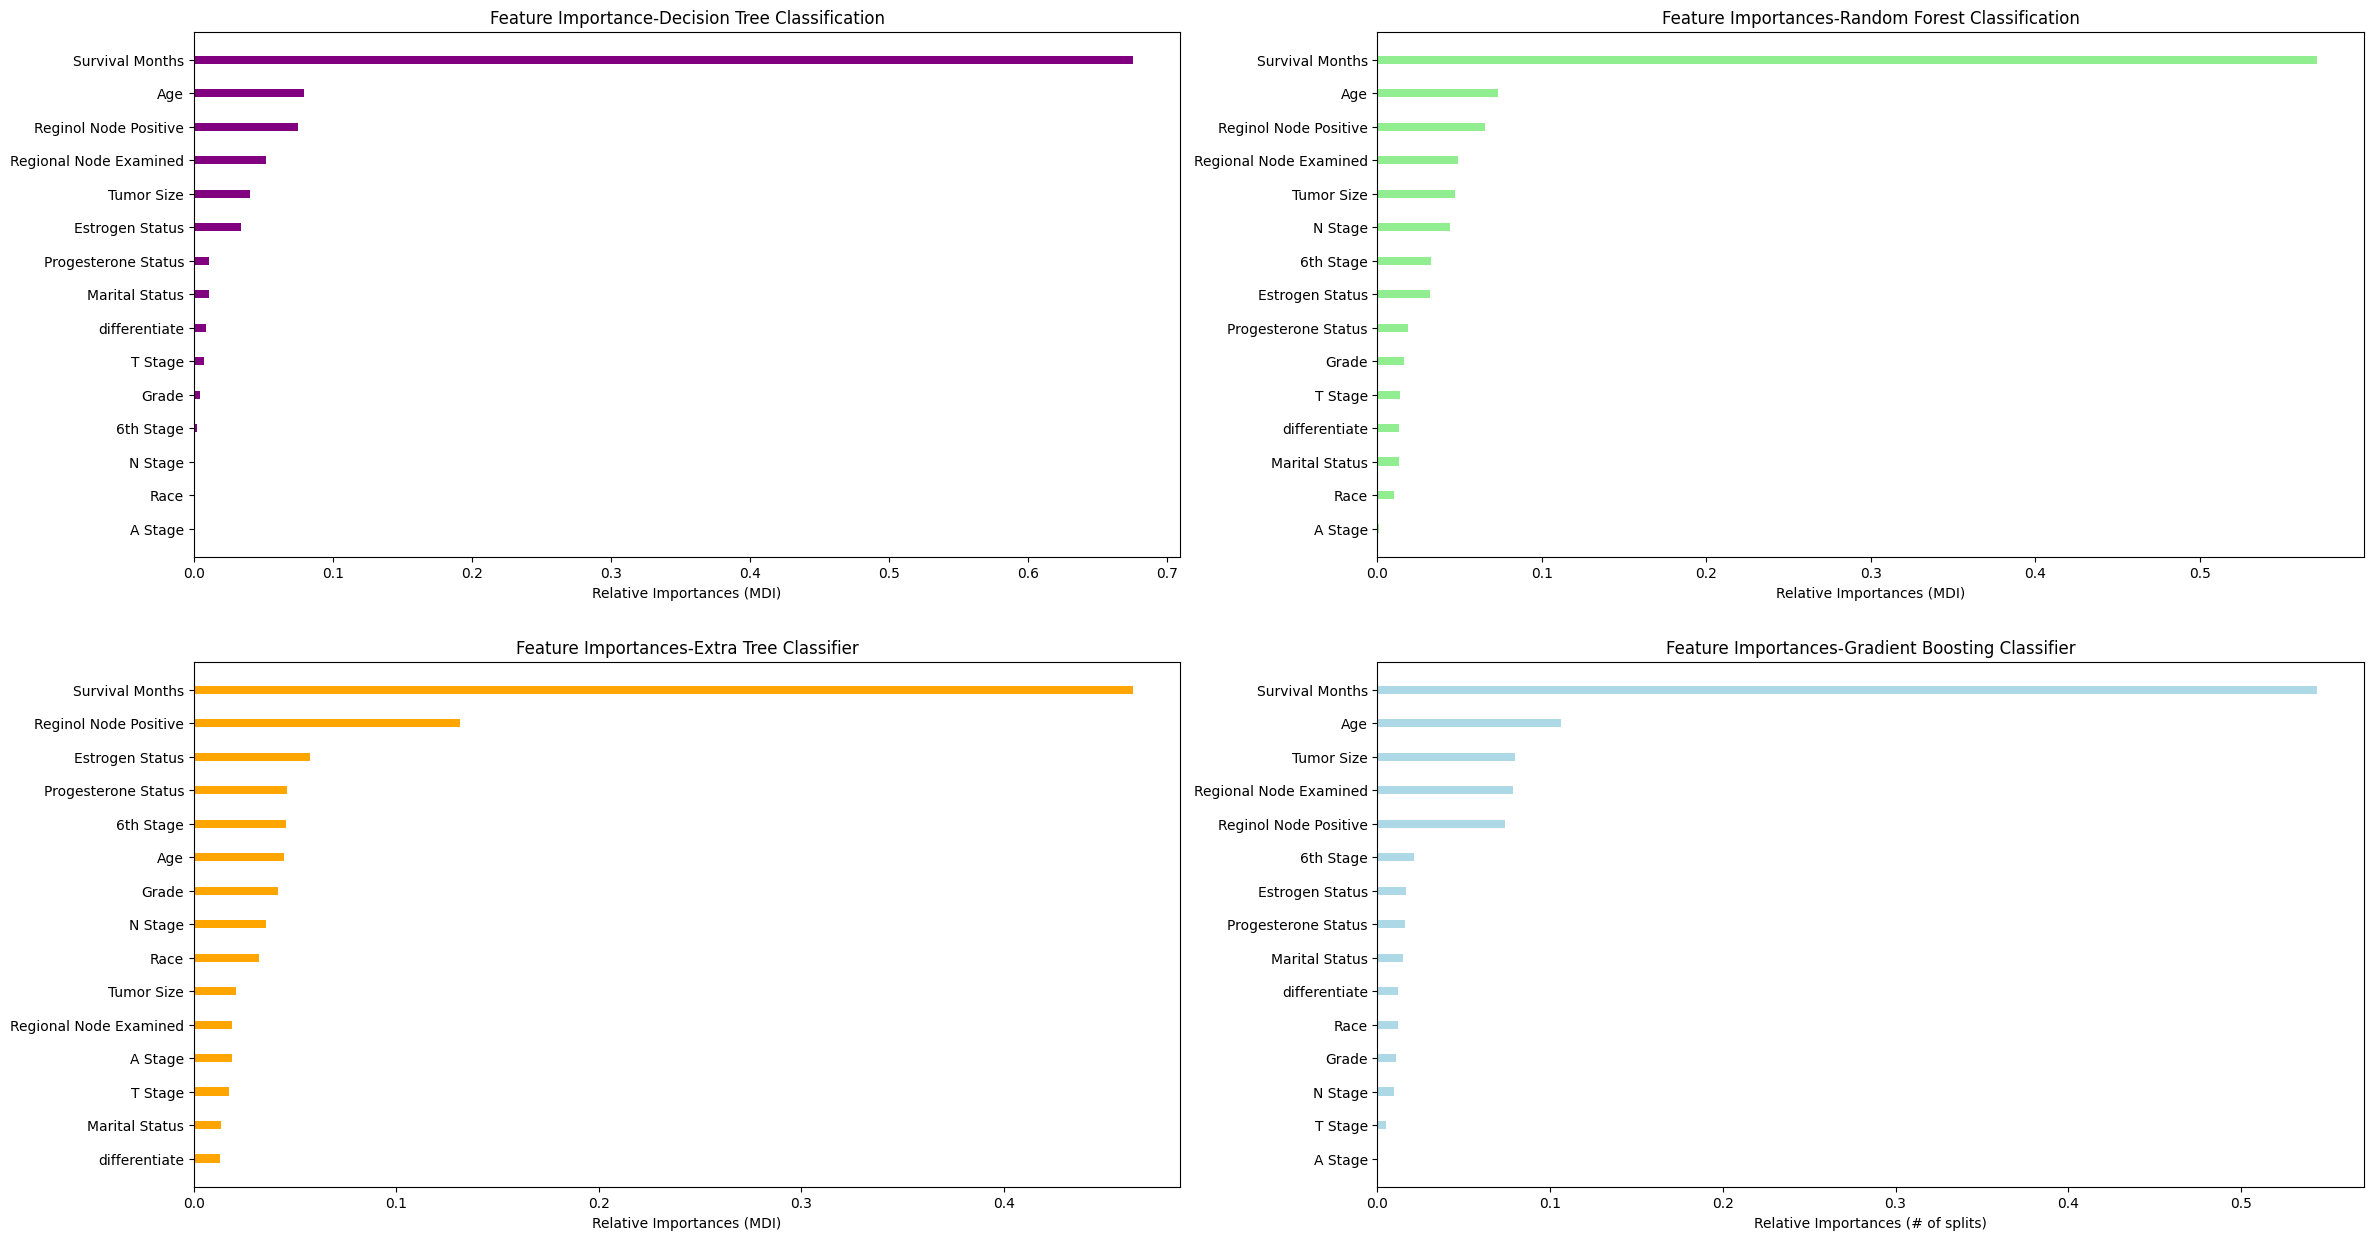

In [67]:
plt.figure(figsize=(28, 15))

# Plot for Decision Tree
plt.subplot(2,2,1)
importances_dtc = final_dtc.best_estimator_.feature_importances_
indices_dtc = np.argsort(importances_dtc)

plt.title('Feature Importance-Decision Tree Classification')
plt.barh(X_scaled.columns, importances_dtc[indices_dtc], .25, color='purple')
plt.yticks(X_scaled.columns, X_scaled.columns[indices_dtc])
plt.xlabel('Relative Importances (MDI)')

# Plot for Extra Tree
plt.subplot(2,2,3)
importances_etc = final_etc.best_estimator_.feature_importances_
indices_etc = np.argsort(importances_etc)

plt.title('Feature Importances-Extra Tree Classifier')
plt.barh(X_scaled.columns, importances_etc[indices_etc], .25, color='orange')
plt.yticks(X_scaled.columns, X_scaled.columns[indices_etc])
plt.xlabel('Relative Importances (MDI)')

# Plot for Random Forest
plt.subplot(2,2,2)
importances_rf = final_rf.best_estimator_.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.title('Feature Importances-Random Forest Classification')
plt.barh(X_scaled.columns, importances_rf[indices_rf], .25, color='lightgreen')
plt.yticks(X_scaled.columns, X_scaled.columns[indices_rf])
plt.xlabel('Relative Importances (MDI)')

# Plot for Gradient Boosting
plt.subplot(2,2,4)
importances_gbc = final_gbc.best_estimator_.feature_importances_
indices_gbc = np.argsort(importances_gbc)

plt.title('Feature Importances-Gradient Boosting Classifier')
plt.barh(X_scaled.columns, importances_gbc[indices_gbc], .25, color='lightblue')
plt.yticks(X_scaled.columns, X_scaled.columns[indices_gbc])
plt.xlabel('Relative Importances (# of splits)')

plt.show()
